In [ ]:
# Assignment-6: A Mathematical Essay on Support Vector Machine

**Author:**
AHMED SHMELS MUHE (GE22M009)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# for styling. Install Scienceplots to reproduce
# plt.style.use(['science','ieee','grid','no-latex'])

In [ ]:
df_train = pd.read_csv('pulsar_data_train.csv')
df_test = pd.read_csv('pulsar_data_test.csv')

## Preliminary analysis

In [ ]:
print(df_train.shape)
print(df_test.shape)

(12528, 9)
(5370, 9)


In [ ]:
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [ ]:
# renaming columns 
column_id = ['mean_integ','stddev_integ','ekurt_integ','skew_integ','mean_dm','stddev_dm','ekurt_dm','skew_dm','target']
df_train.columns = column_id
df_test.columns = column_id

In [ ]:
df_train.head()

,mean_integ,stddev_integ,ekurt_integ,skew_integ,mean_dm,stddev_dm,ekurt_dm,skew_dm,target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
df_test.head()

,mean_integ,stddev_integ,ekurt_integ,skew_integ,mean_dm,stddev_dm,ekurt_dm,skew_dm,target
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [ ]:
df_train.dtypes

mean_integ      float64
stddev_integ    float64
ekurt_integ     float64
skew_integ      float64
mean_dm         float64
stddev_dm       float64
ekurt_dm        float64
skew_dm         float64
target          float64
dtype: object

In [ ]:
df_test.dtypes

mean_integ      float64
stddev_integ    float64
ekurt_integ     float64
skew_integ      float64
mean_dm         float64
stddev_dm       float64
ekurt_dm        float64
skew_dm         float64
target          float64
dtype: object

every column contains only numeric column. Good for now

In [ ]:
df_train.describe()

,mean_integ,stddev_integ,ekurt_integ,skew_integ,mean_dm,stddev_dm,ekurt_dm,skew_dm,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### Few definitions: 

#### Kurtosis:
- how fat a distribution's tail is when compared to the center of the distribution. 
- Excess Kurtosis signals that the probability of obtaining an extreme outcome or value from the event in question is higher than would be found in a probabilistically normal distribution of outcomes. i.e compares the kurtosis coefficient with a normal distribution. 
- Excess kurtosis means the distribution of event outcomes have lots of instances of outlier results, causing fat tails on the bell-shaped distribution curve. Normal distributions have a kurtosis of three. Excess kurtosis can, therefore, be calculated by subtracting kurtosis by three. 
- When excess kurtosis is positive, the tails are heavier and when it is negative, tails are thinner than the normal distribution.

#### Skewness: 
- degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution.
- Positive/Right skewed: the mean of the data is greater than the median (a large number of data-pushed on the right-hand side)
- Negative/Left skewed: the mean of the data is less than the median (a large number of data-pushed on the left-hand side)

### Addressing Missing Values:

In [ ]:
# percentage of missing values in train
df_train.isnull().sum()/df_train.shape[0] *100

mean_integ       0.000000
stddev_integ     0.000000
ekurt_integ     13.848978
skew_integ       0.000000
mean_dm          0.000000
stddev_dm        9.402937
ekurt_dm         0.000000
skew_dm          4.988825
target           0.000000
dtype: float64

In [ ]:
# percentage of missing values in test
df_test.isnull().sum()/df_test.shape[0] *100

mean_integ        0.000000
stddev_integ      0.000000
ekurt_integ      14.283054
skew_integ        0.000000
mean_dm           0.000000
stddev_dm         9.757914
ekurt_dm          0.000000
skew_dm           4.543762
target          100.000000
dtype: float64

### Missing values distribution

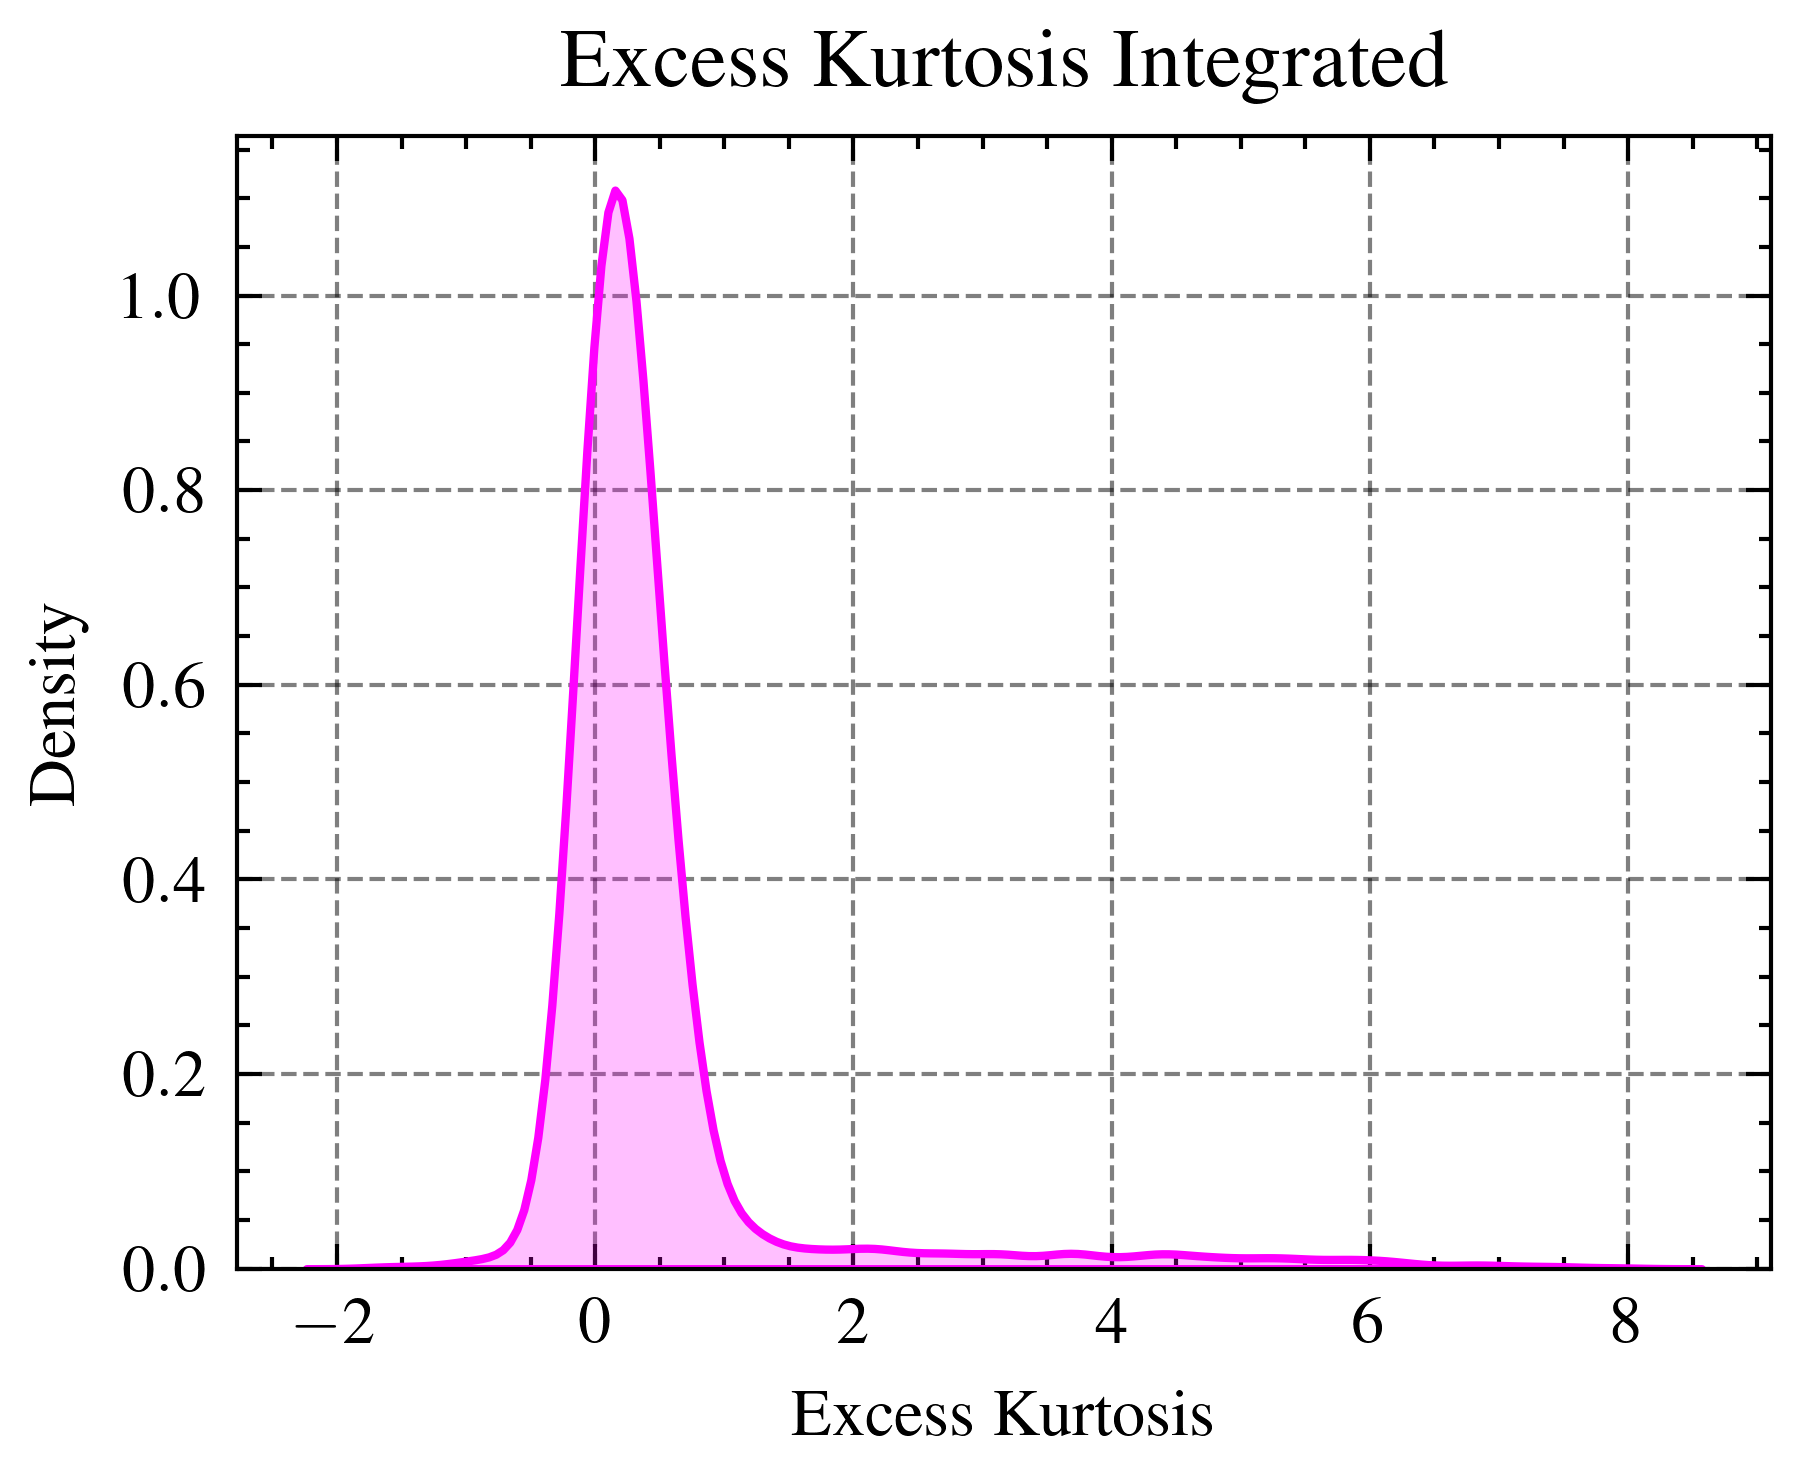

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["ekurt_integ"], color="fuchsia", shade=True)
plt.title('Excess Kurtosis Integrated',fontsize = 10)
ax.set(xlabel='Excess Kurtosis')
# plt.xlim(-10,20)
plt.savefig('ExcessKurtosisMissing')
plt.show()

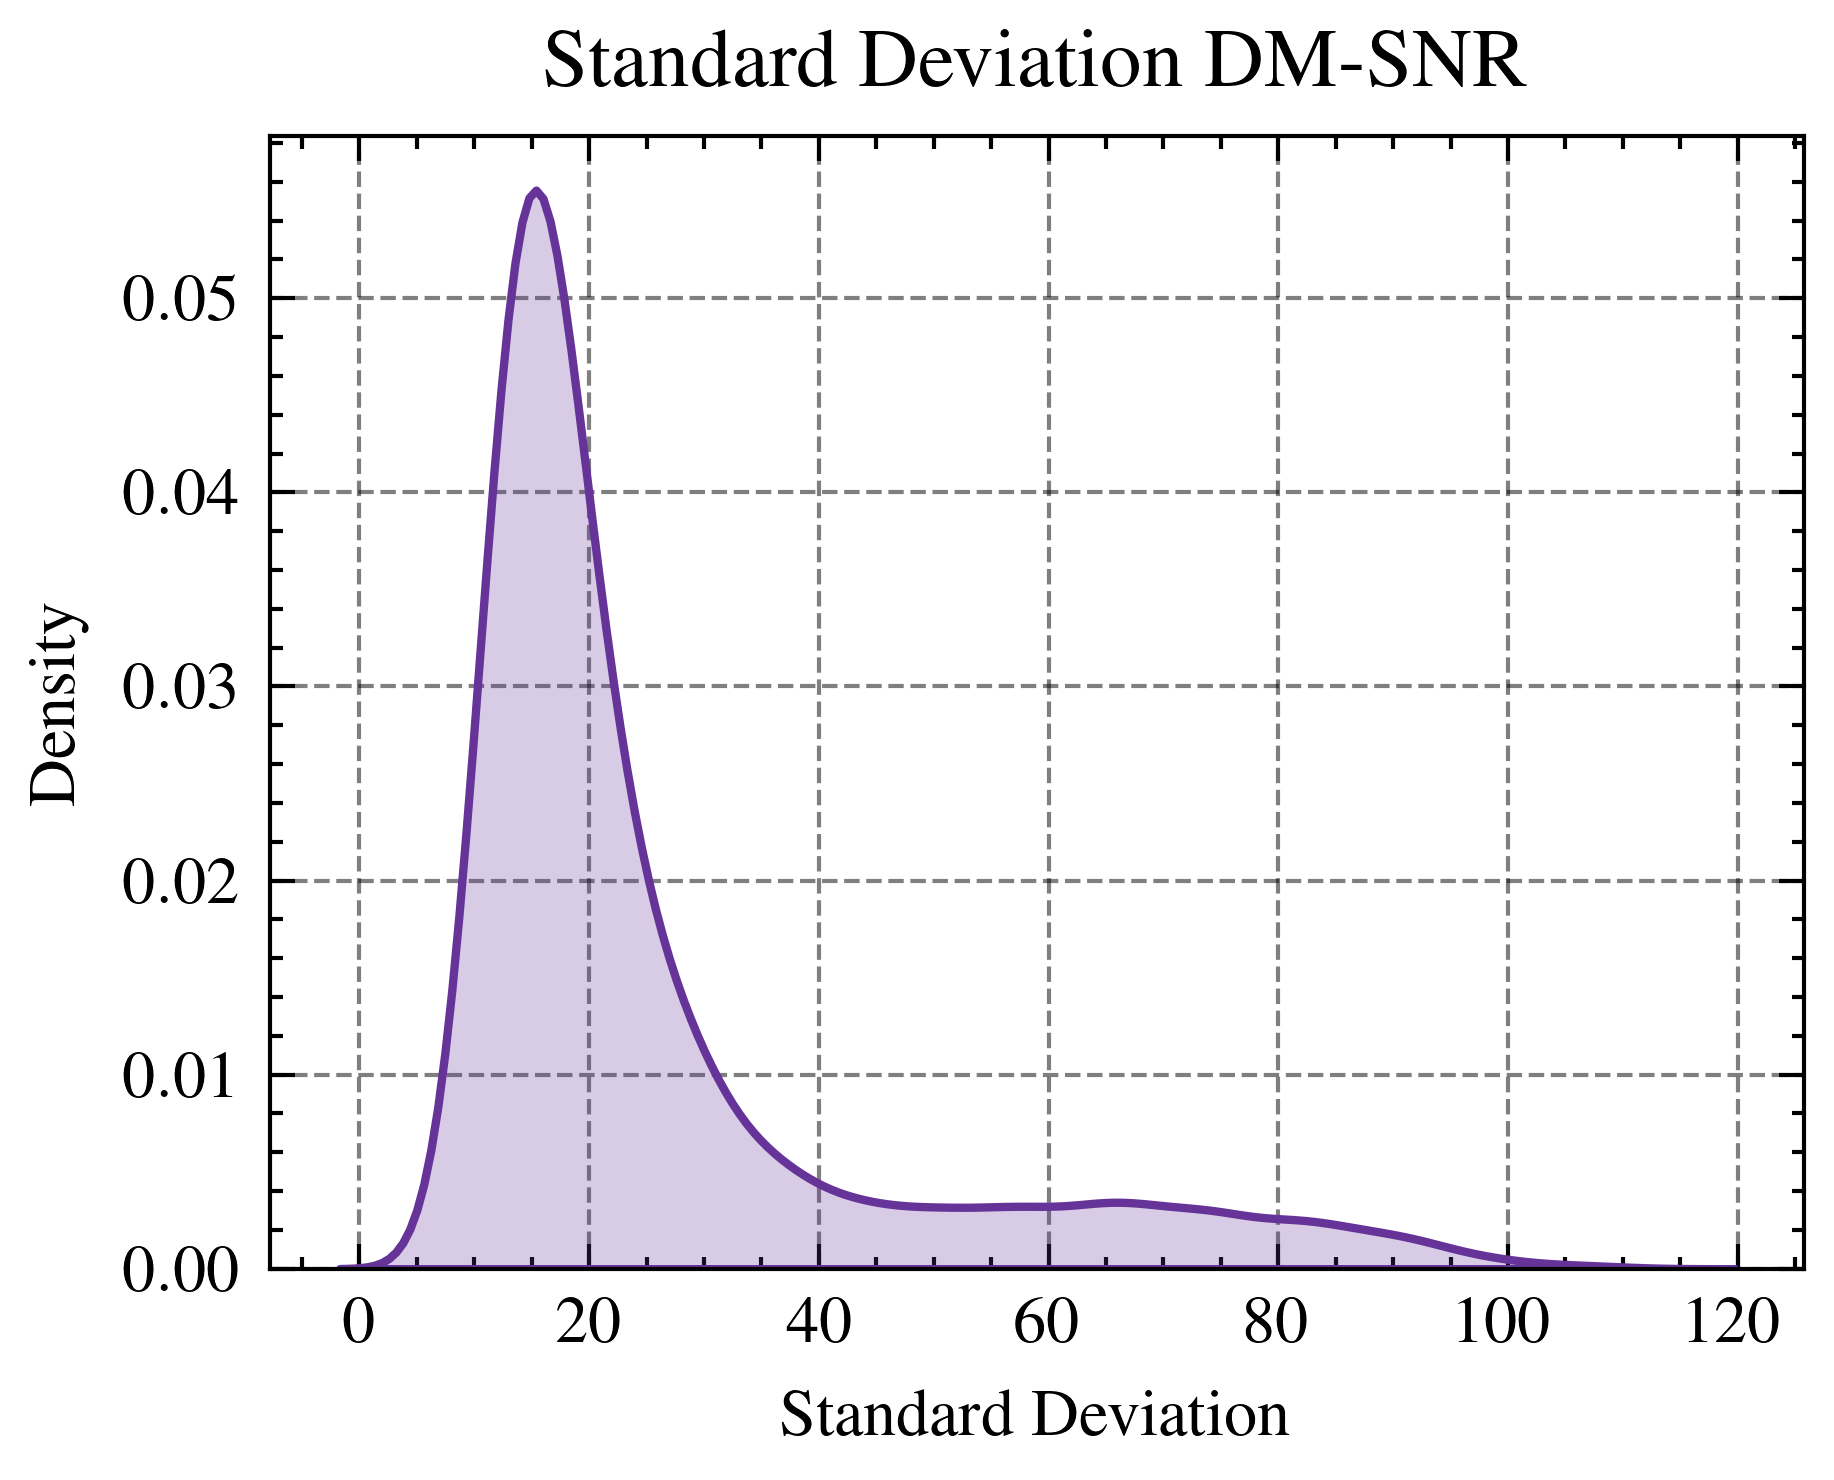

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["stddev_dm"], color="rebeccapurple", shade=True)
plt.title('Standard Deviation DM-SNR',fontsize = 10)
ax.set(xlabel='Standard Deviation')
# plt.xlim(-10,20)
plt.savefig('Standarddevmissing')
plt.show()

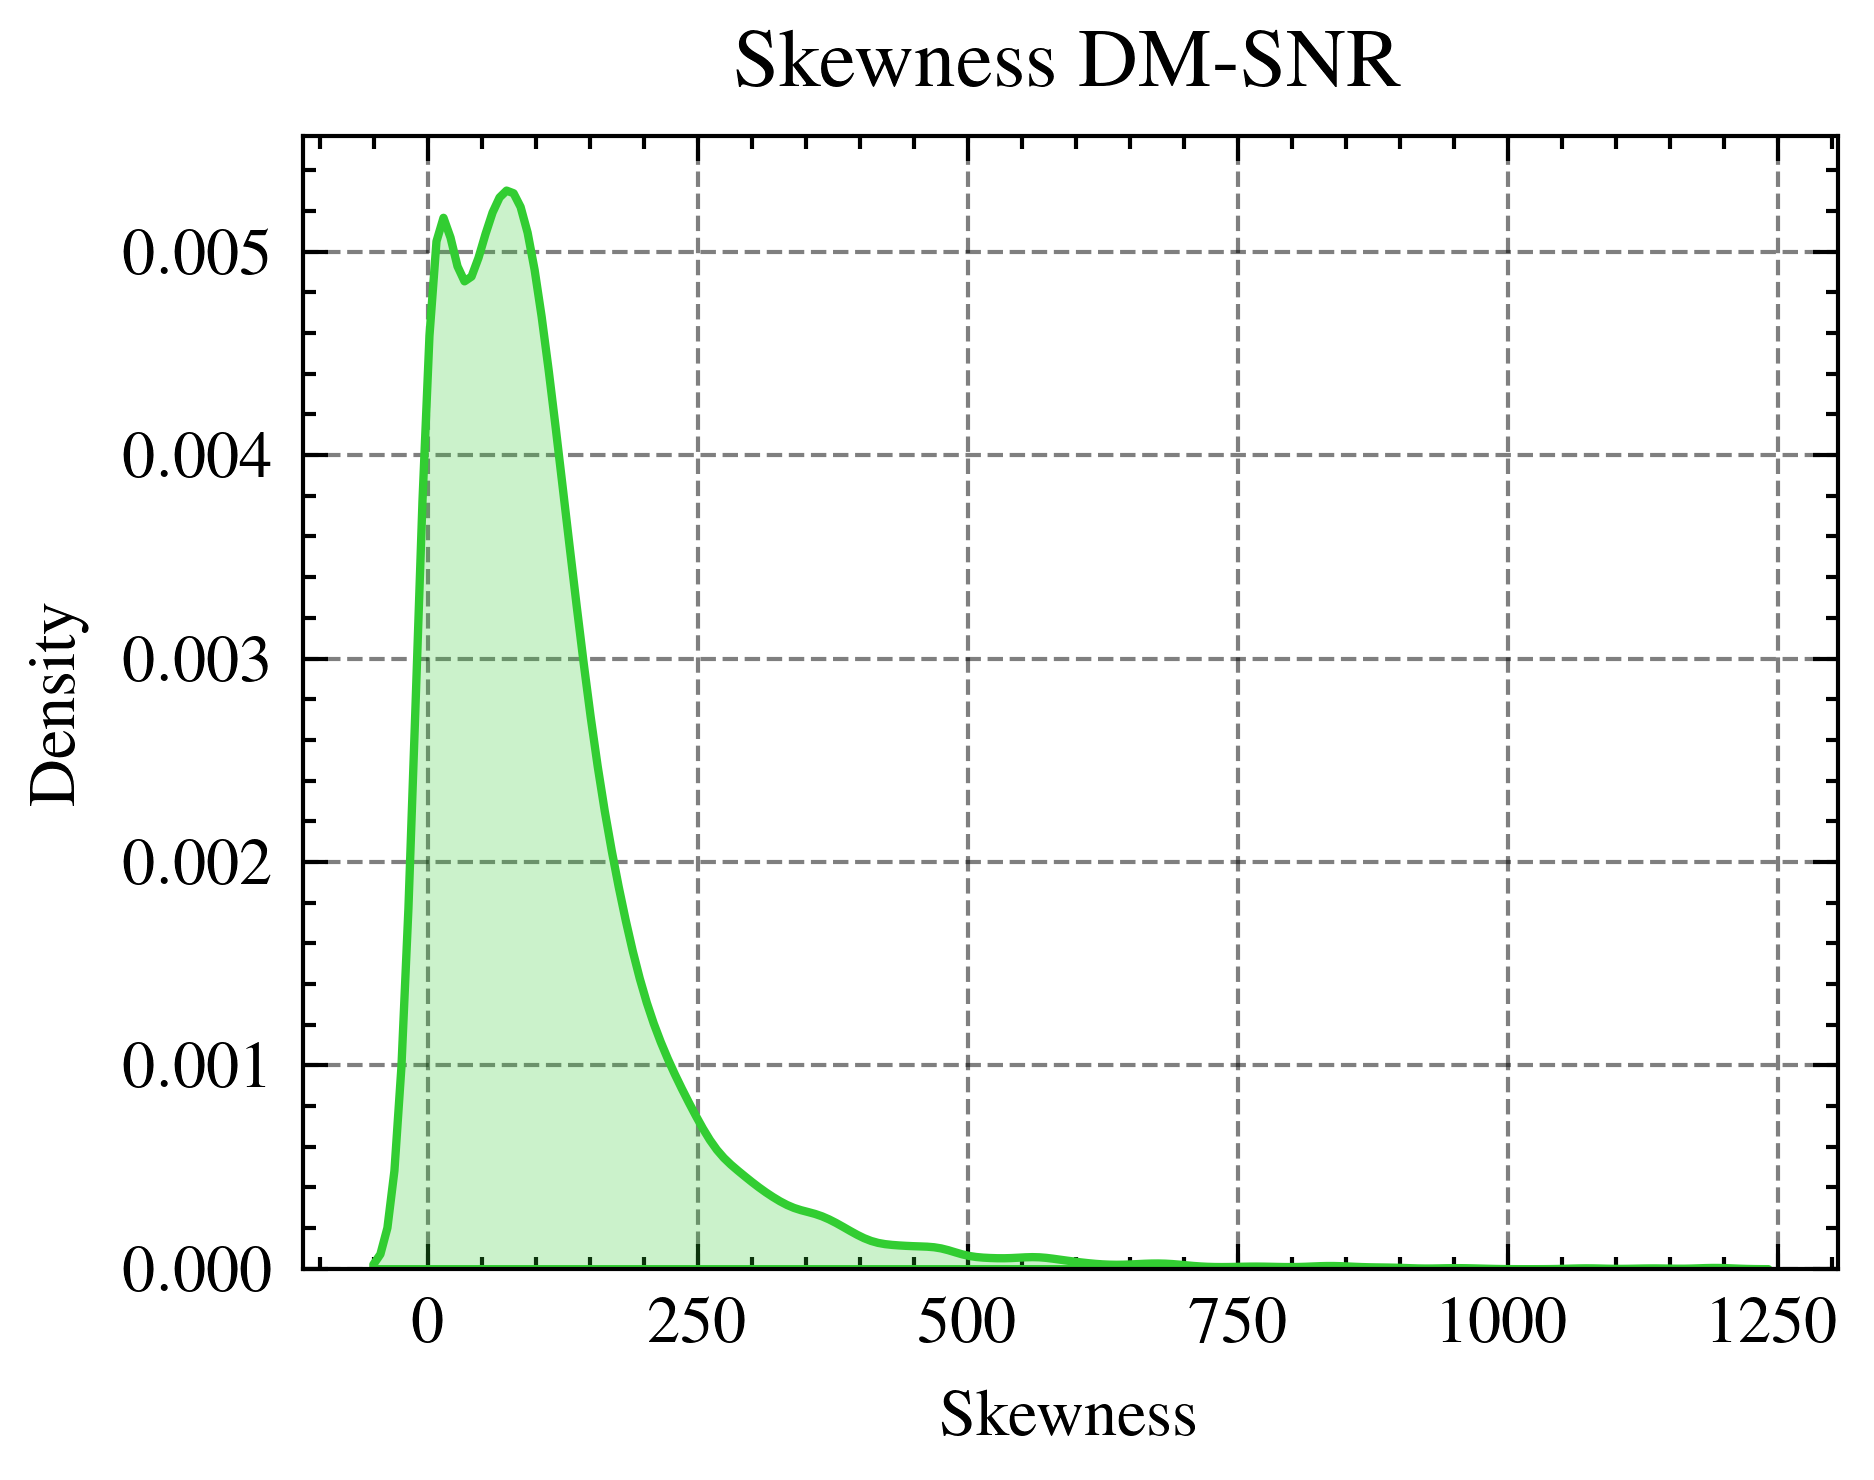

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["skew_dm"], color='limegreen', shade=True)
plt.title('Skewness DM-SNR',fontsize = 10)
ax.set(xlabel='Skewness')
# plt.xlim(-10,20)
plt.savefig('Skewnessmissing')
plt.show()

Looking at these plots, the distributions of these features possess high tails, no clear patterns between mean, median/mode. So, let's look at better ways than simple mean/median imputation

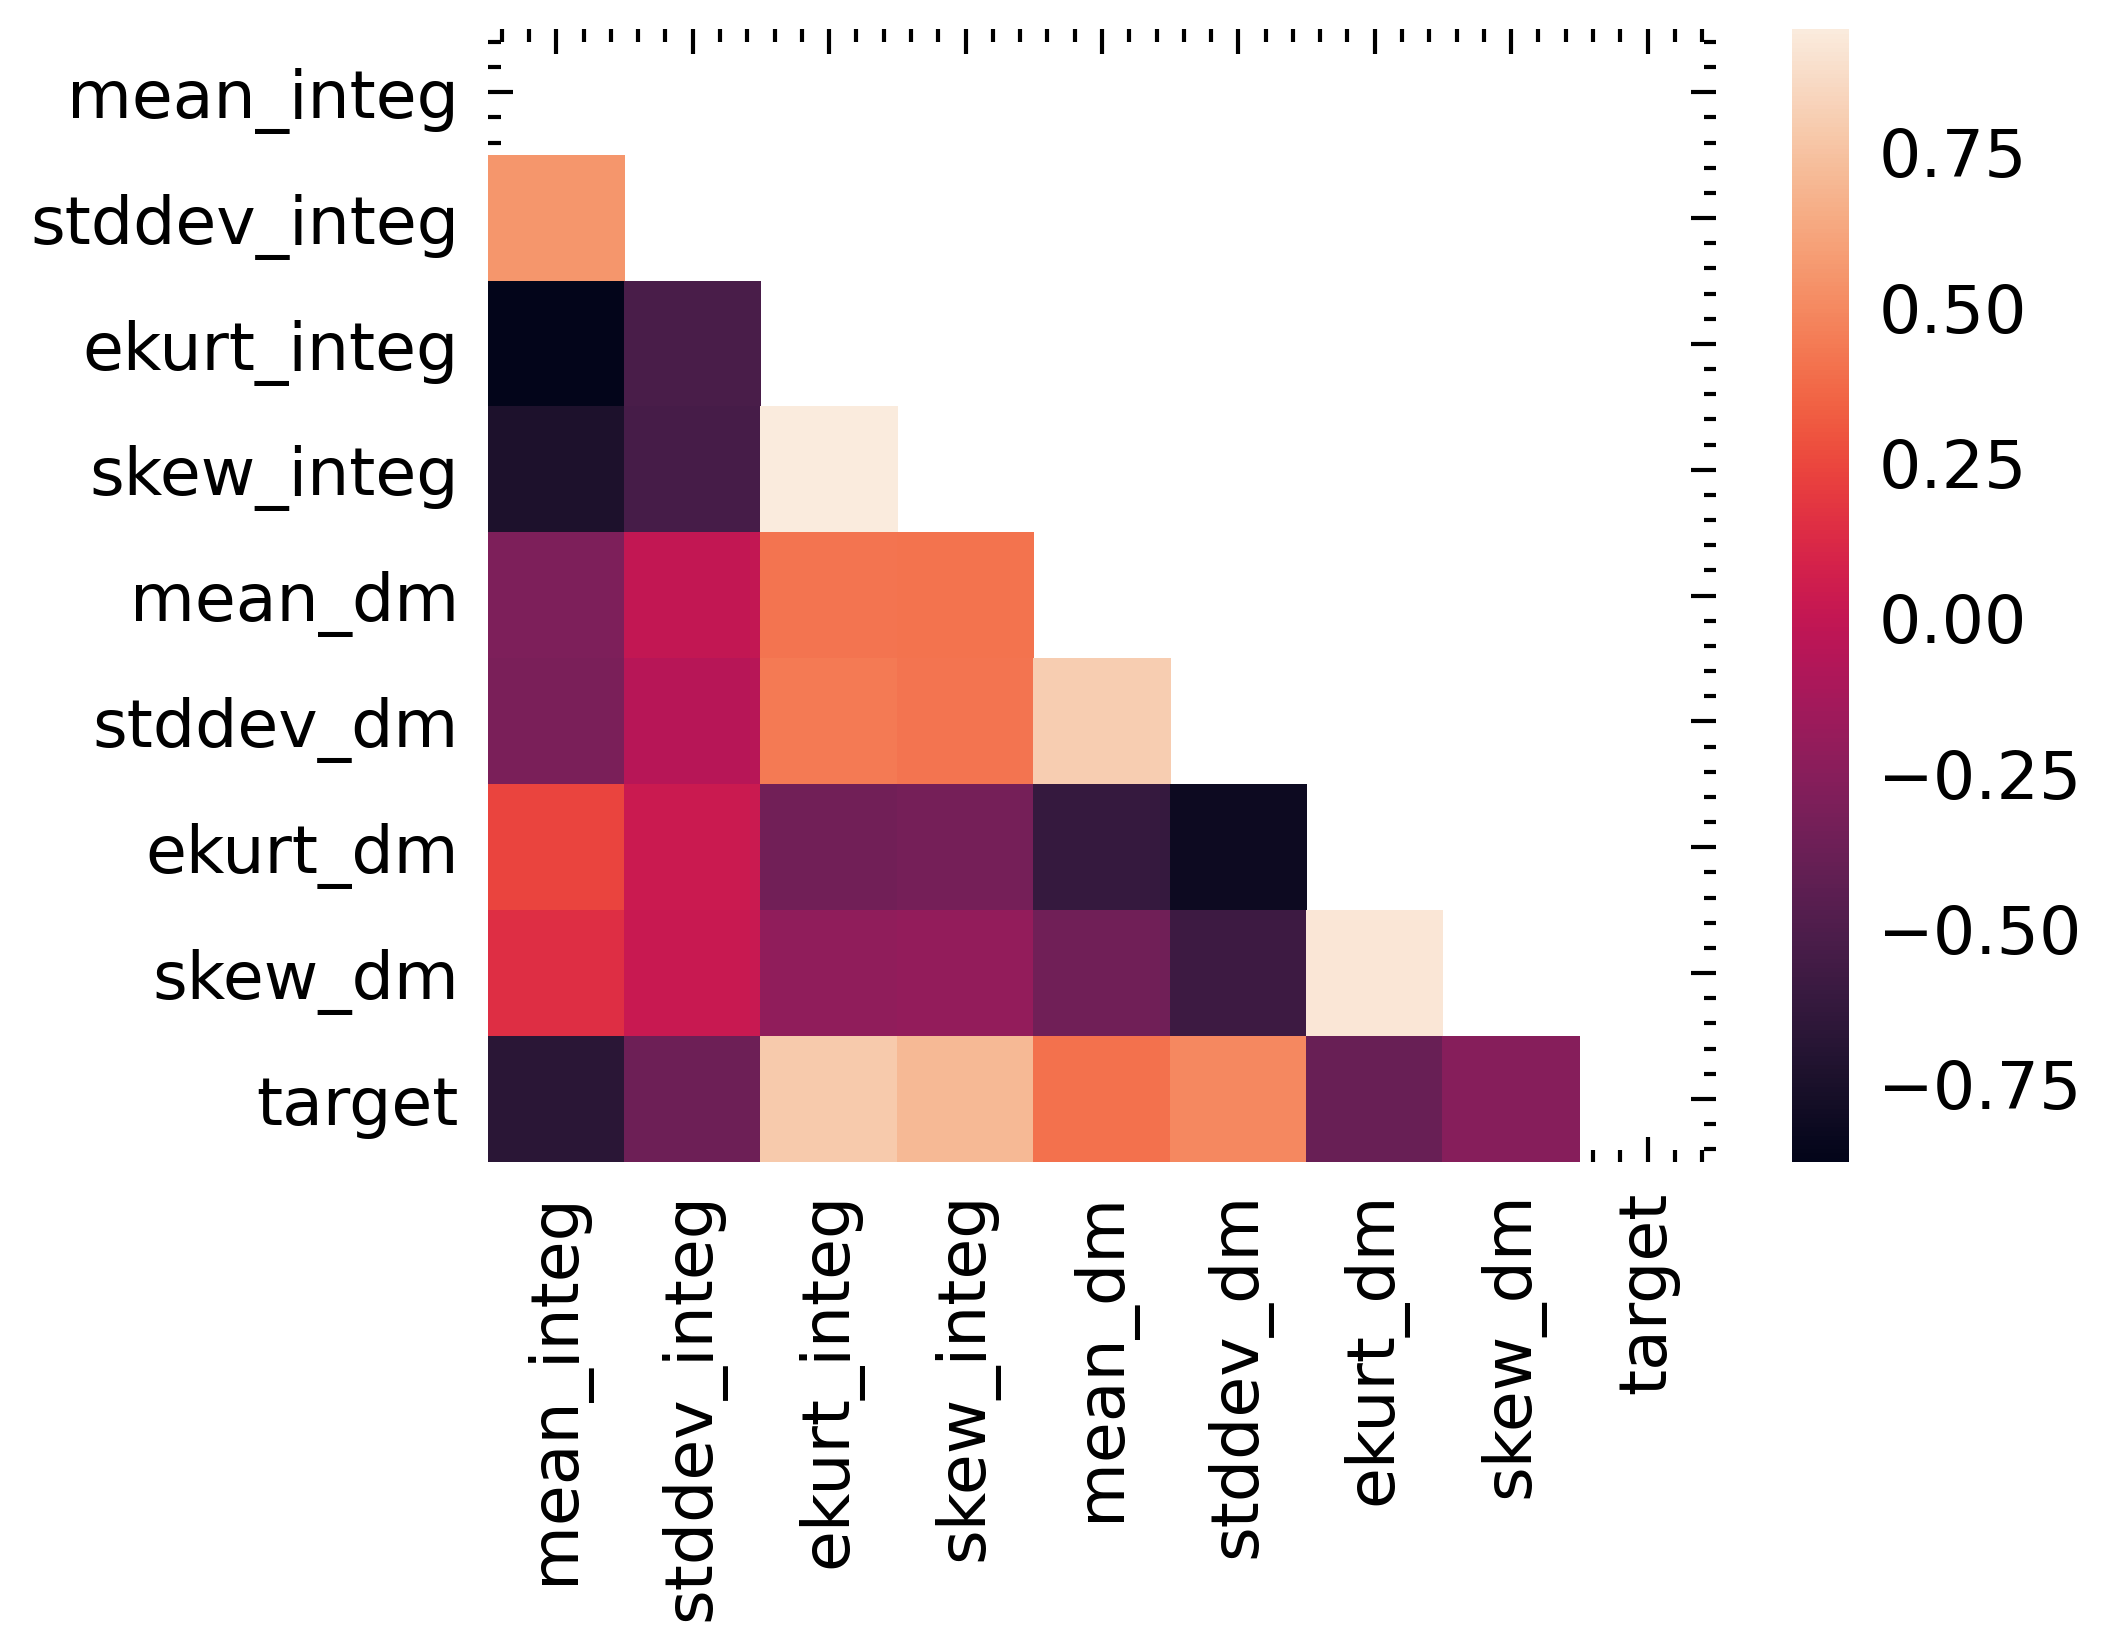

In [ ]:
corr = df_train.corr()
matrix = np.triu(corr)
sns.heatmap(corr,mask = matrix) #annot has been set to off for clarity
plt.savefig('featurecorrelation')
plt.show()

There is a fair amount of correlation between features and we could use this fact to impute the features

## Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
df = df_train.drop('target',axis=1)
imp.fit(df)
df[df.columns] = imp.transform(df)

In [ ]:
# no more null elements
df.isnull().sum()/df.shape[0] *100

mean_integ      0.0
stddev_integ    0.0
ekurt_integ     0.0
skew_integ      0.0
mean_dm         0.0
stddev_dm       0.0
ekurt_dm        0.0
skew_dm         0.0
dtype: float64

In [ ]:
# descriptive statistics of imputed dataframe
df.describe()

,mean_integ,stddev_integ,ekurt_integ,skew_integ,mean_dm,stddev_dm,ekurt_dm,skew_dm
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.480142,1.778431,12.674758,26.302726,8.333489,105.844663
std,25.672828,6.801077,1.063379,6.208450,29.613230,19.409716,4.535783,107.324717
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,-2.556700,-3.139270,-44.871945
25%,100.871094,42.362222,0.024962,-0.188142,1.910535,14.428745,5.803063,35.098867
50%,115.183594,46.931022,0.225367,0.203317,2.792642,18.631138,8.451097,83.475749
75%,127.109375,50.979103,0.477949,0.932374,5.413253,28.581331,10.727927,140.788106
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837


In [ ]:
# descriptive statistics of original dataframe
df_train.describe()

,mean_integ,stddev_integ,ekurt_integ,skew_integ,mean_dm,stddev_dm,ekurt_dm,skew_dm,target
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


Both original and imputed resembles alike. This is a better strategy than constant imputation

In [ ]:
df_train[df.columns] = df.copy()

## Exploratory Data Analysis

#### Imbalancedness

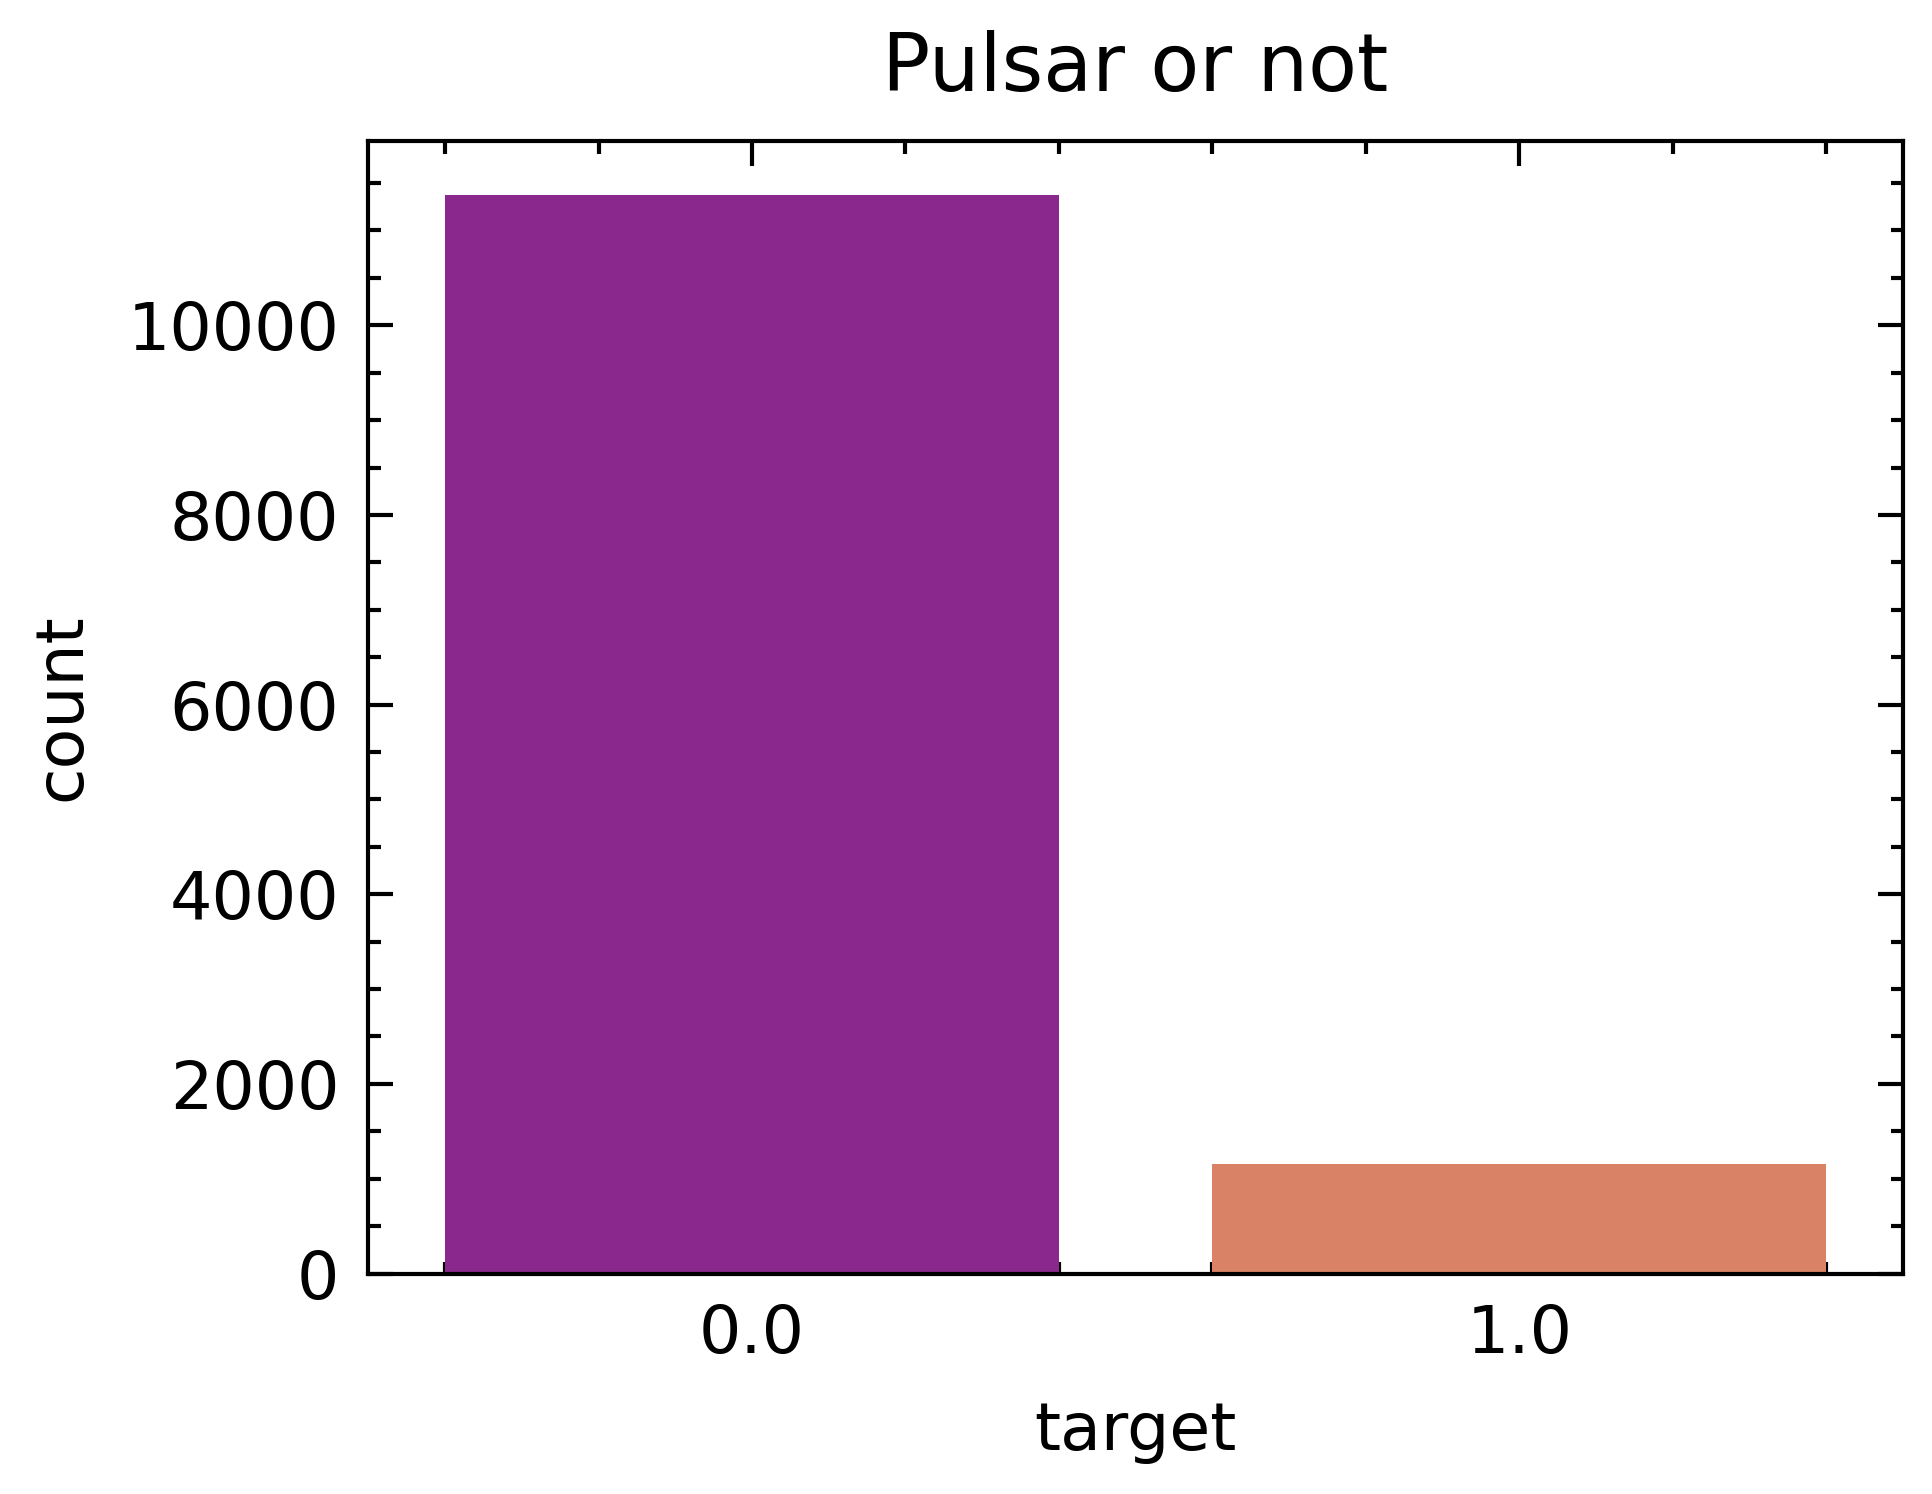

In [ ]:
sns.countplot(x = 'target',data = df_train, palette = 'plasma')
plt.title('Pulsar or not')
plt.grid(False)
plt.savefig('imbalancedness')
plt.show()

In [ ]:
N = df_train.shape[0]
print('Pulsar: ',len(df_train[df_train['target']==1])/N*100)
print('Not Pulsar: ',len(df_train[df_train['target']==0])/N*100)

Pulsar:  9.20338441890166
Not Pulsar:  90.79661558109834


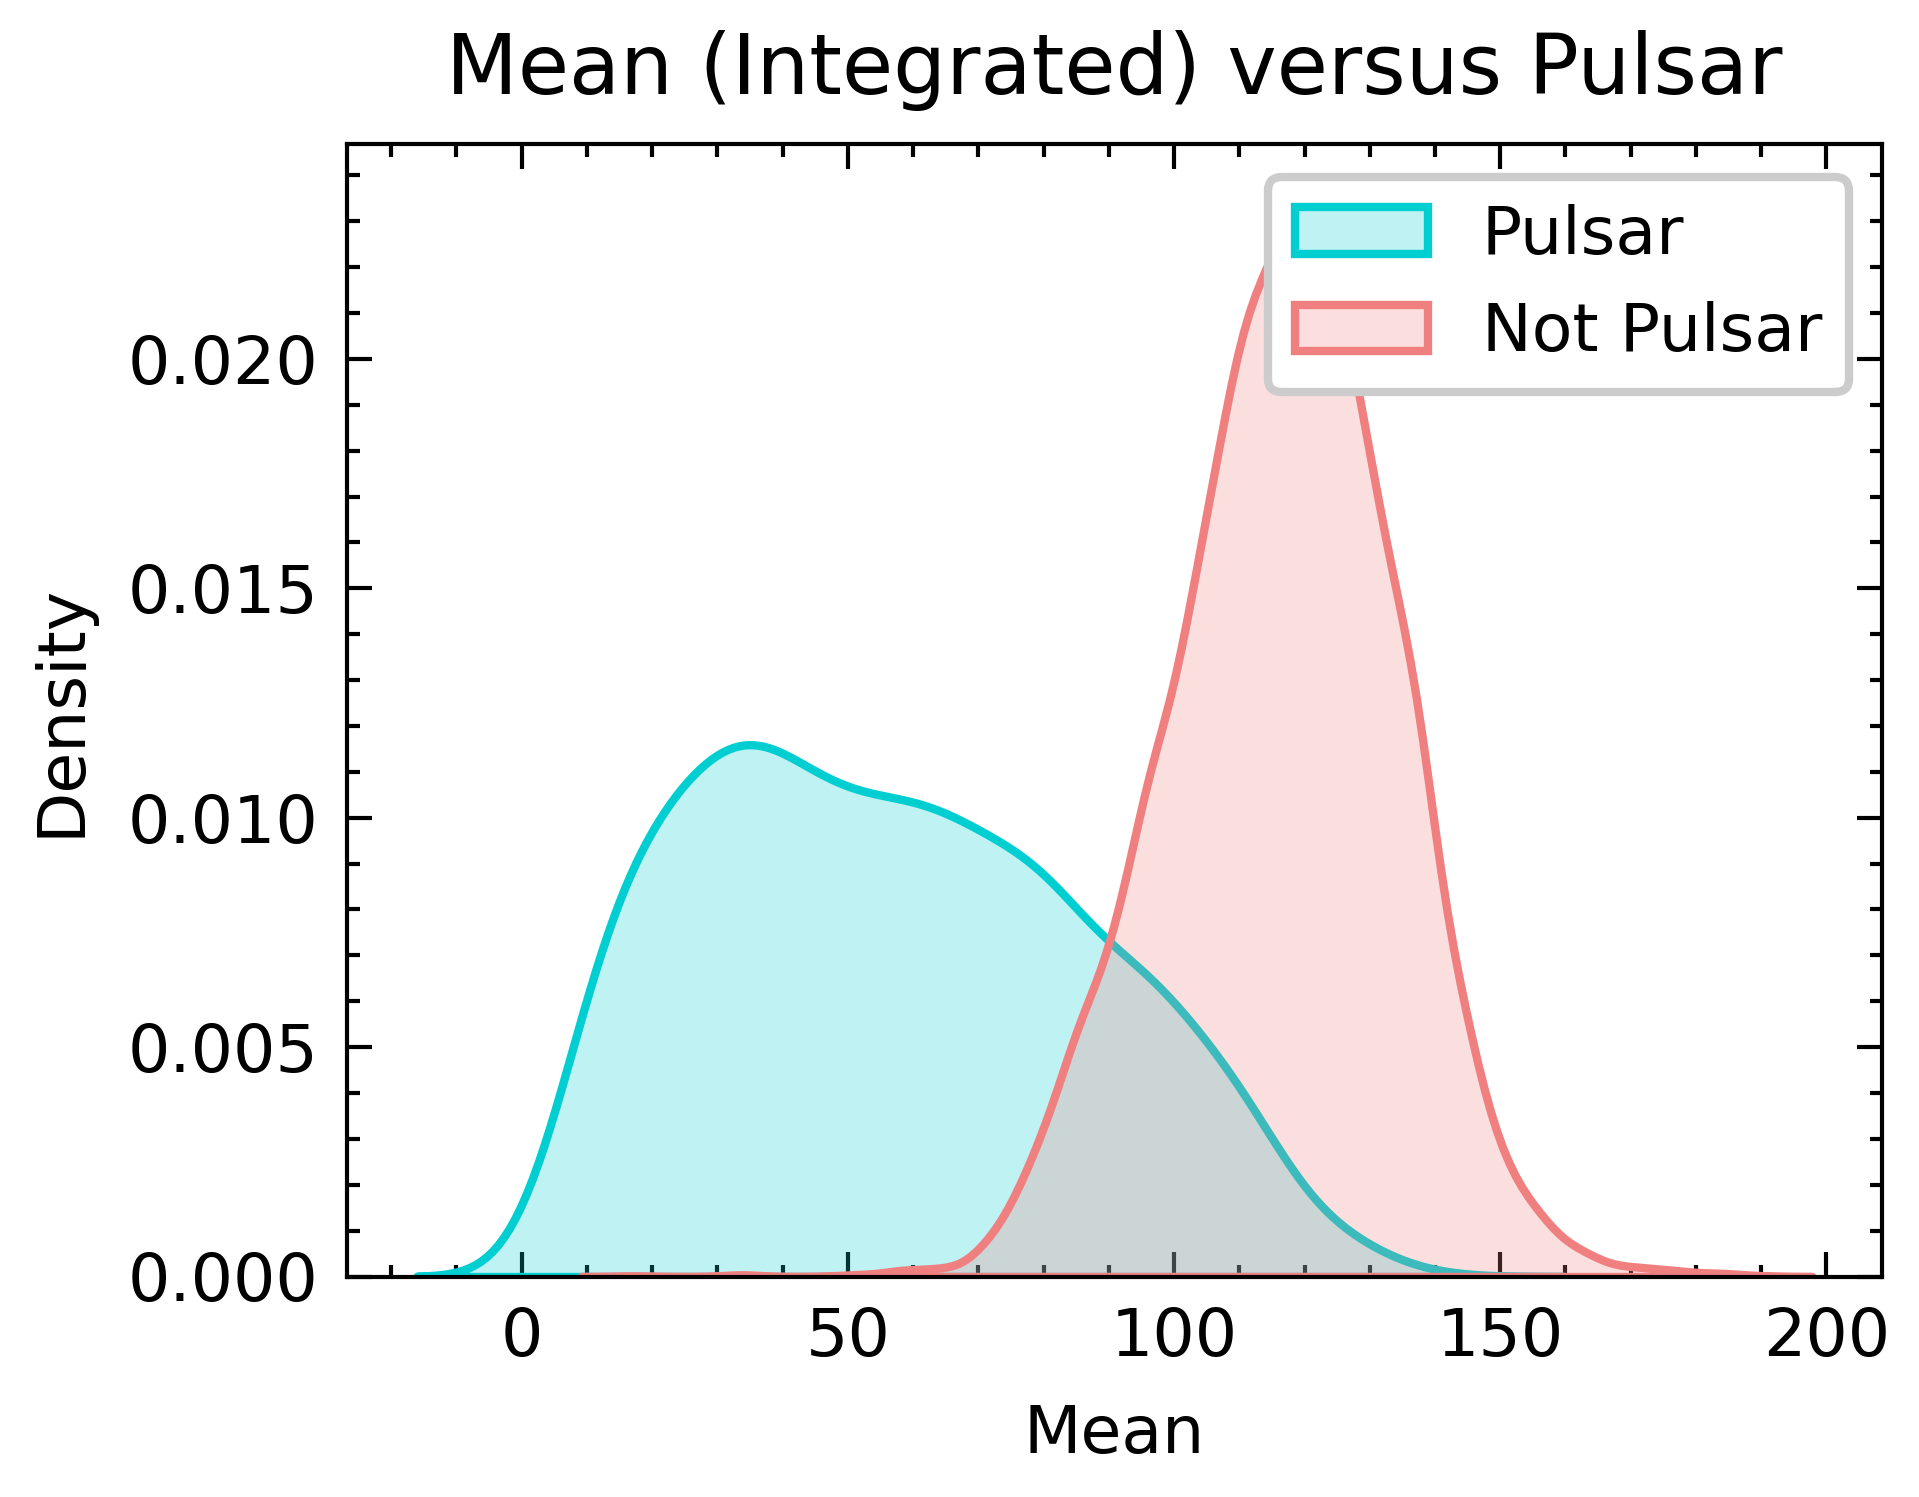

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["mean_integ"][df_train.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["mean_integ"][df_train.target == 0], color="lightcoral", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Mean (Integrated) versus Pulsar',fontsize = 10)
ax.set(xlabel='Mean')
# plt.xlim(-10,85)
plt.grid(False)
plt.savefig('Mean_integvs integ')
plt.show()

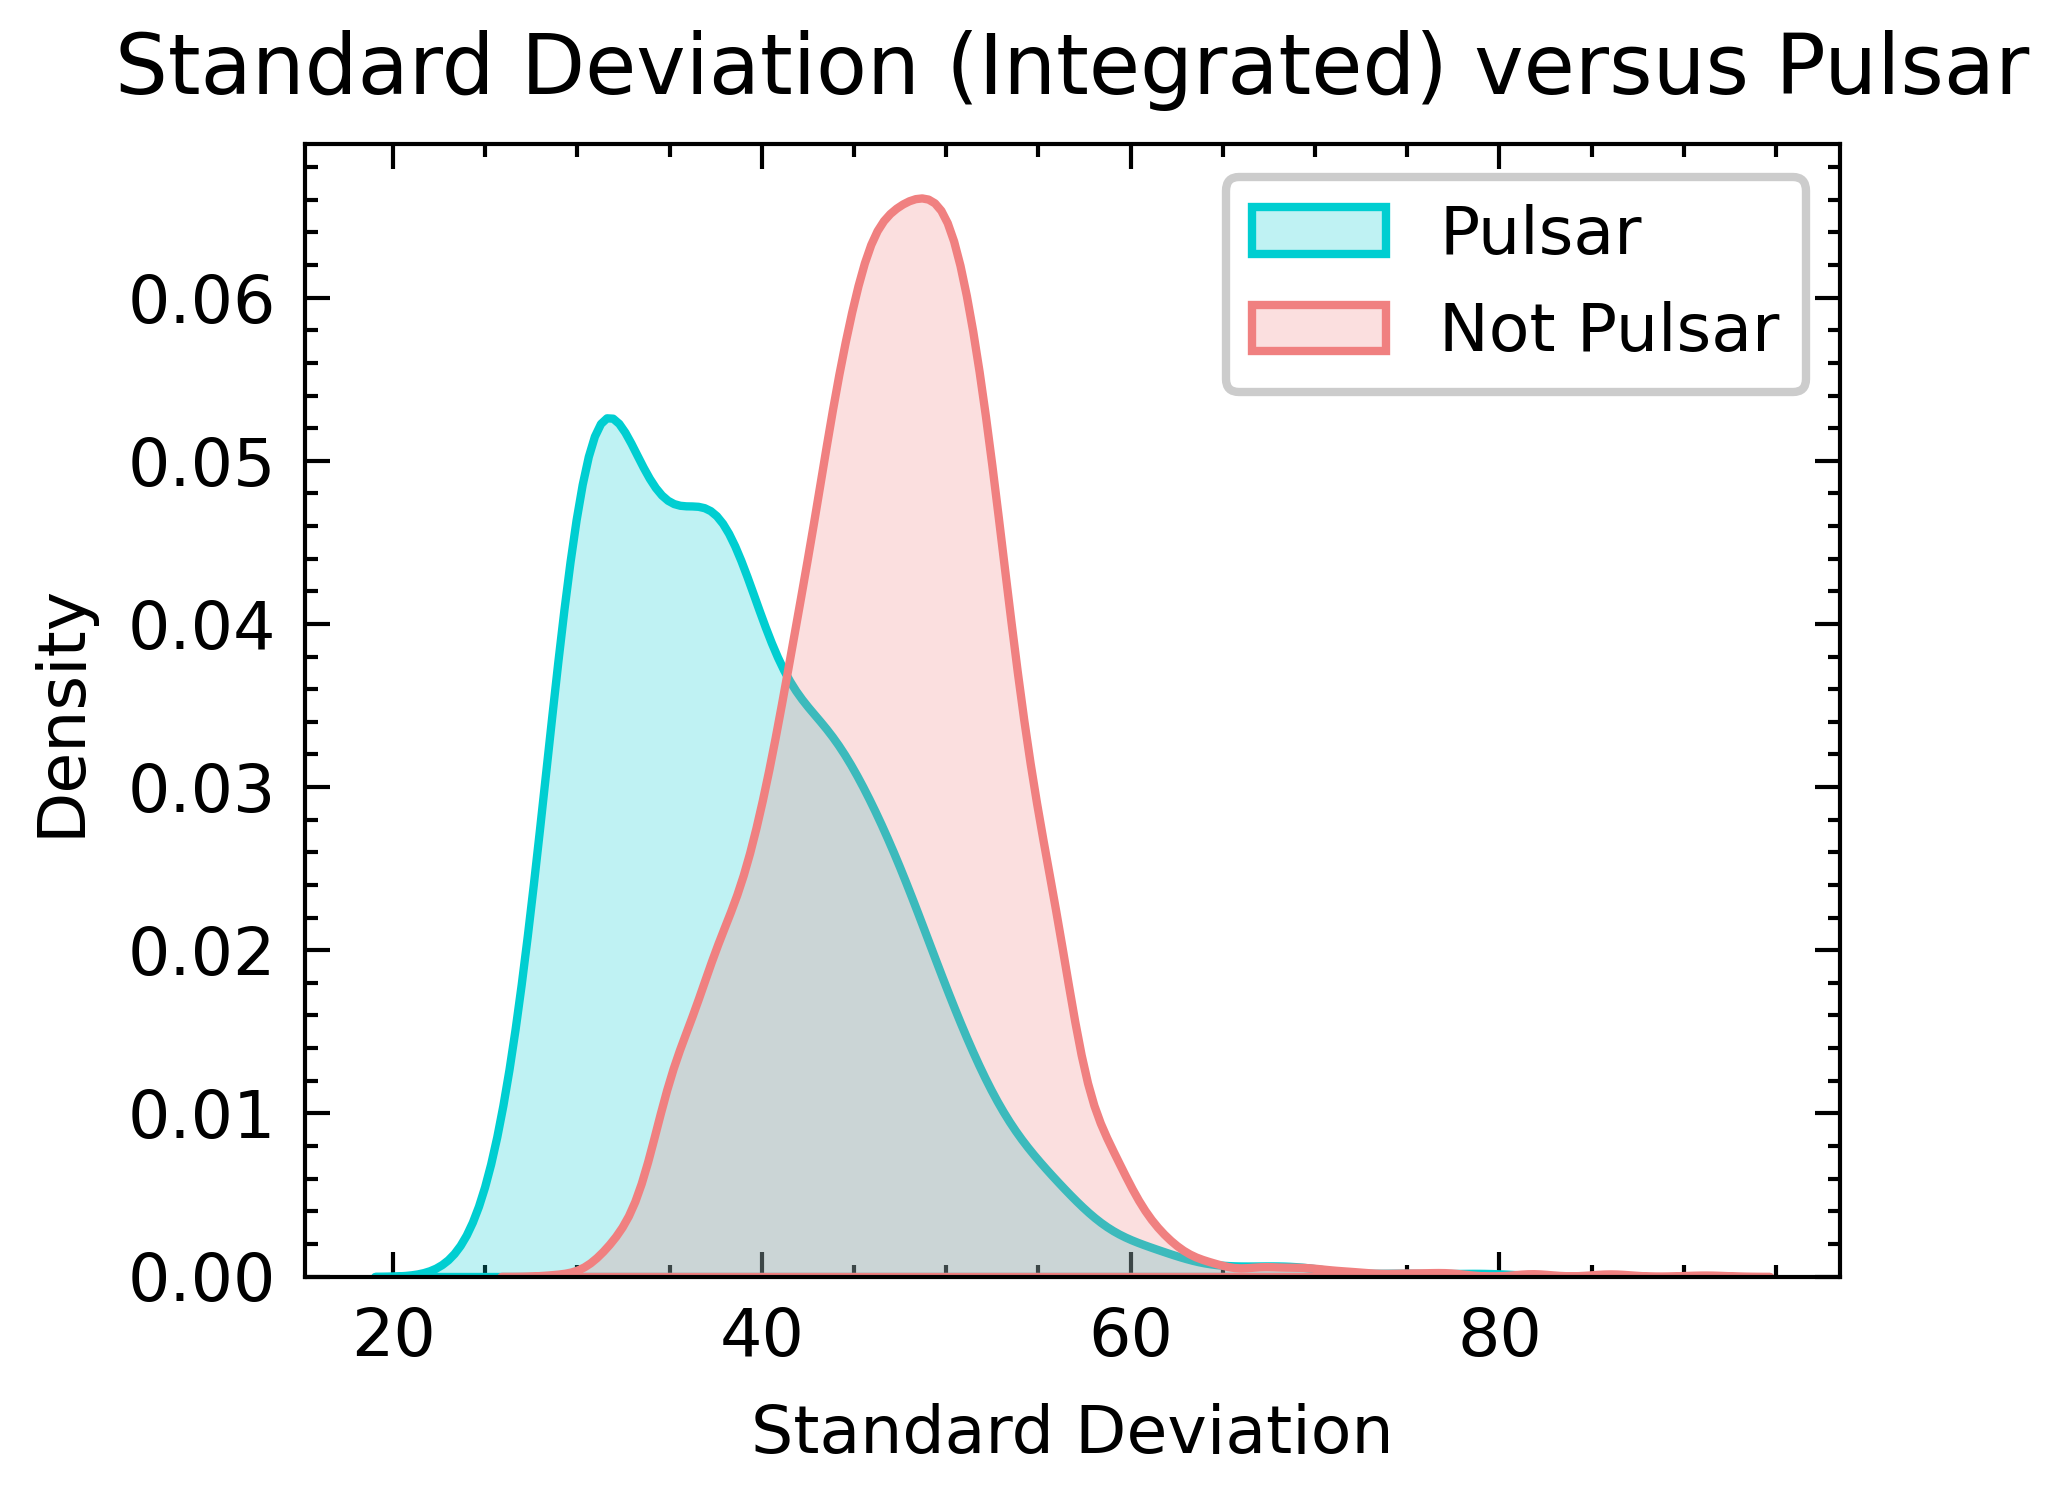

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["stddev_integ"][df_train.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["stddev_integ"][df_train.target == 0], color="lightcoral", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Standard Deviation (Integrated) versus Pulsar',fontsize = 10)
ax.set(xlabel='Standard Deviation')
# plt.xlim(-10,85)
plt.grid(False)
plt.savefig('stddevvs integ')
plt.show()

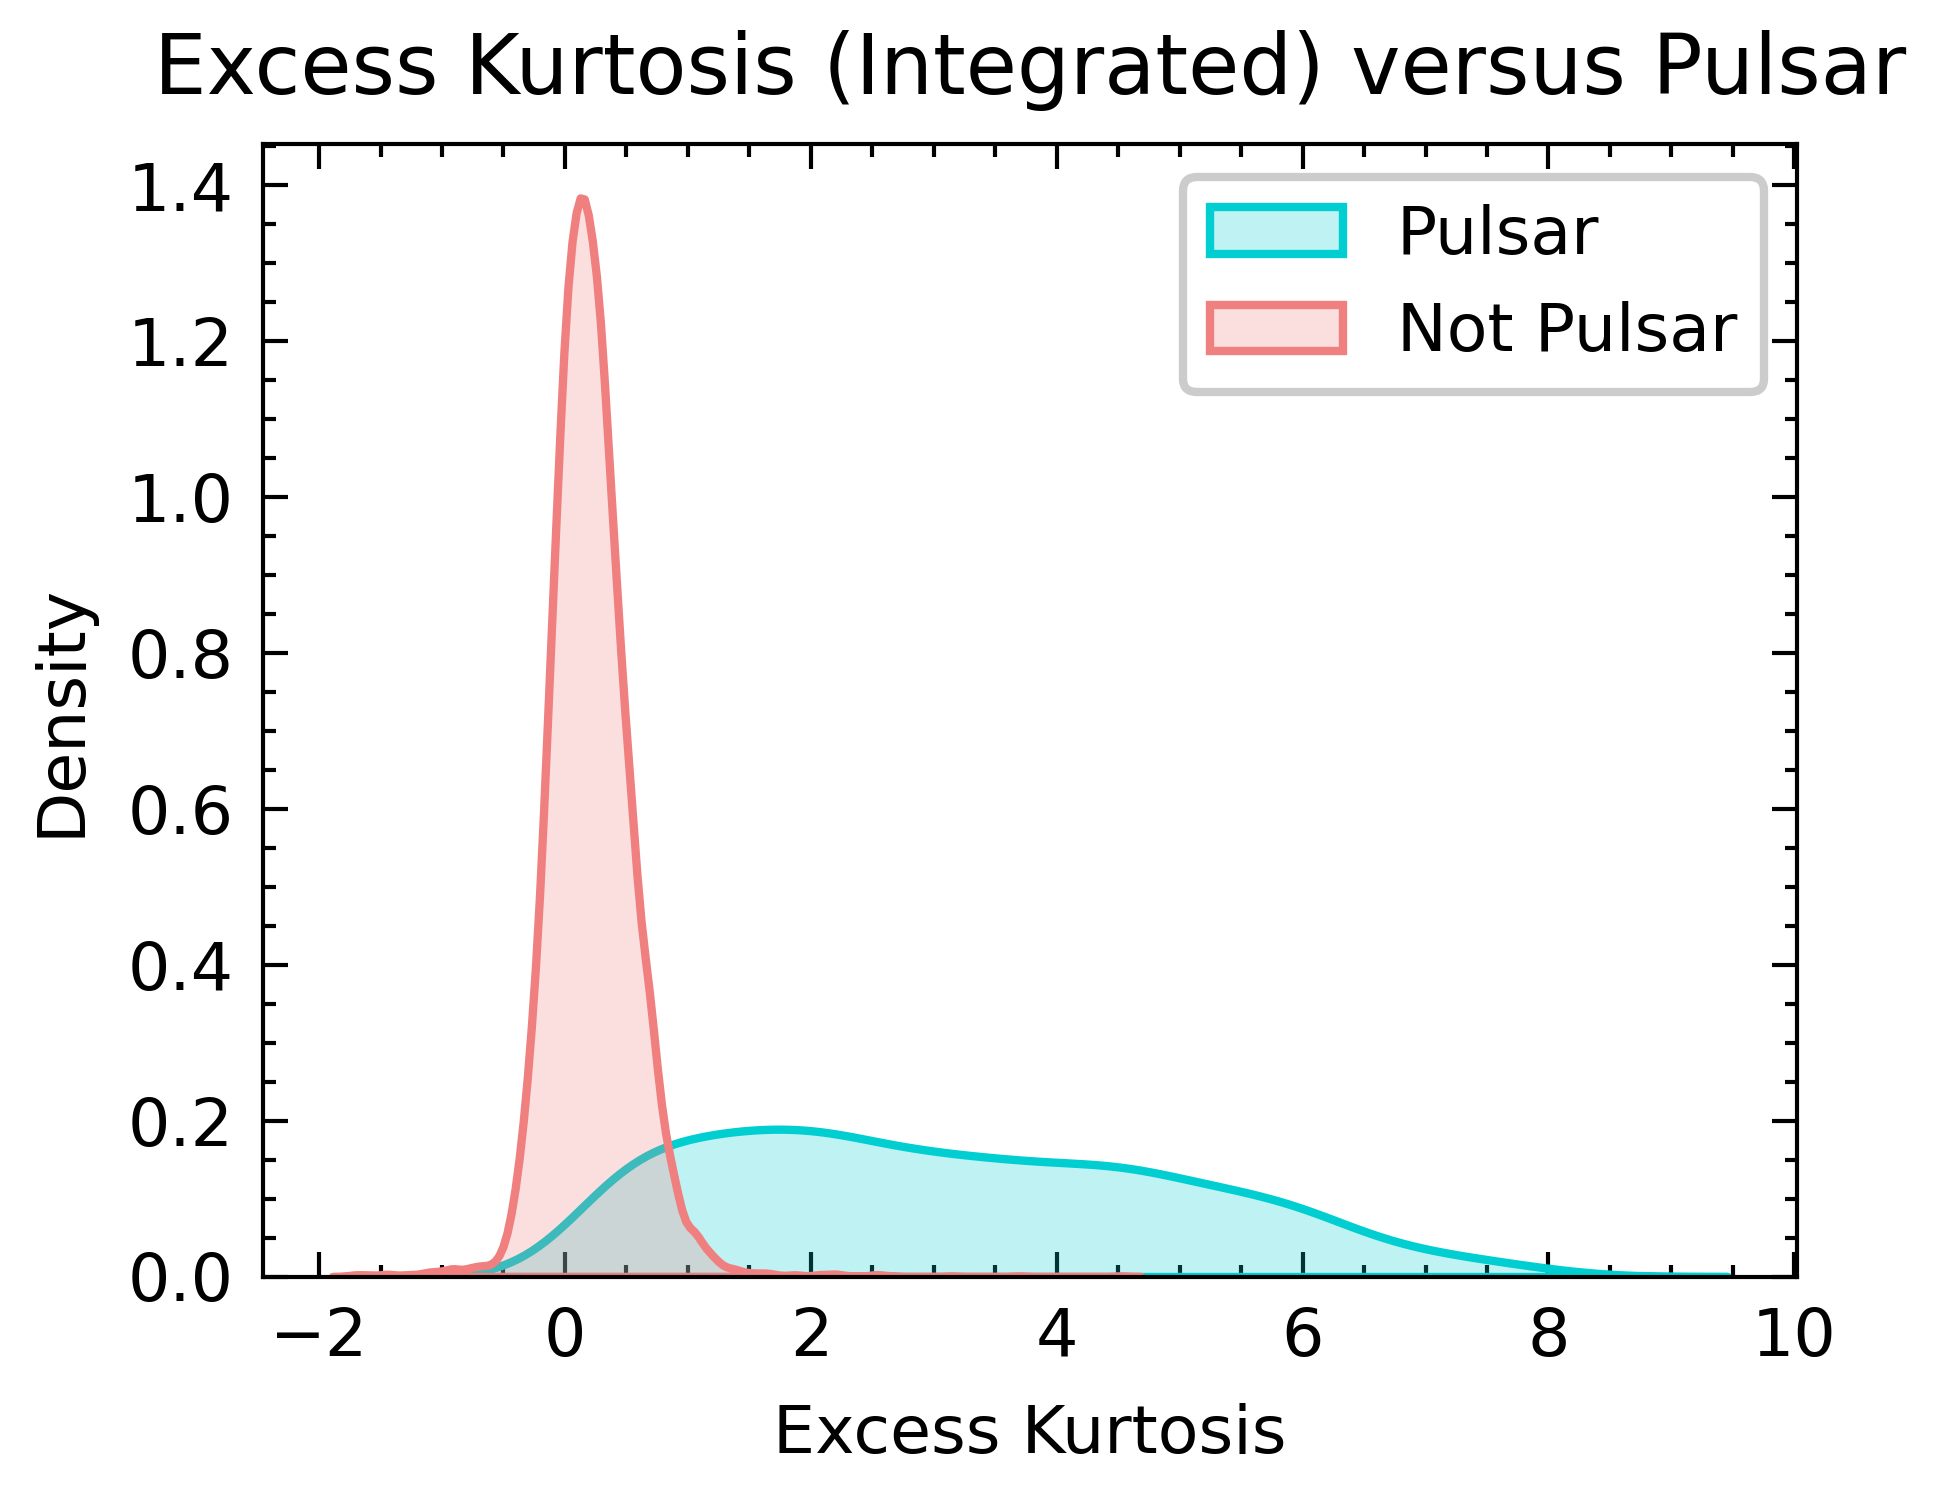

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["ekurt_integ"][df_train.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["ekurt_integ"][df_train.target == 0], color="lightcoral", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Excess Kurtosis (Integrated) versus Pulsar',fontsize = 10)
ax.set(xlabel='Excess Kurtosis')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('ExcessKurtosis integ')
plt.show()

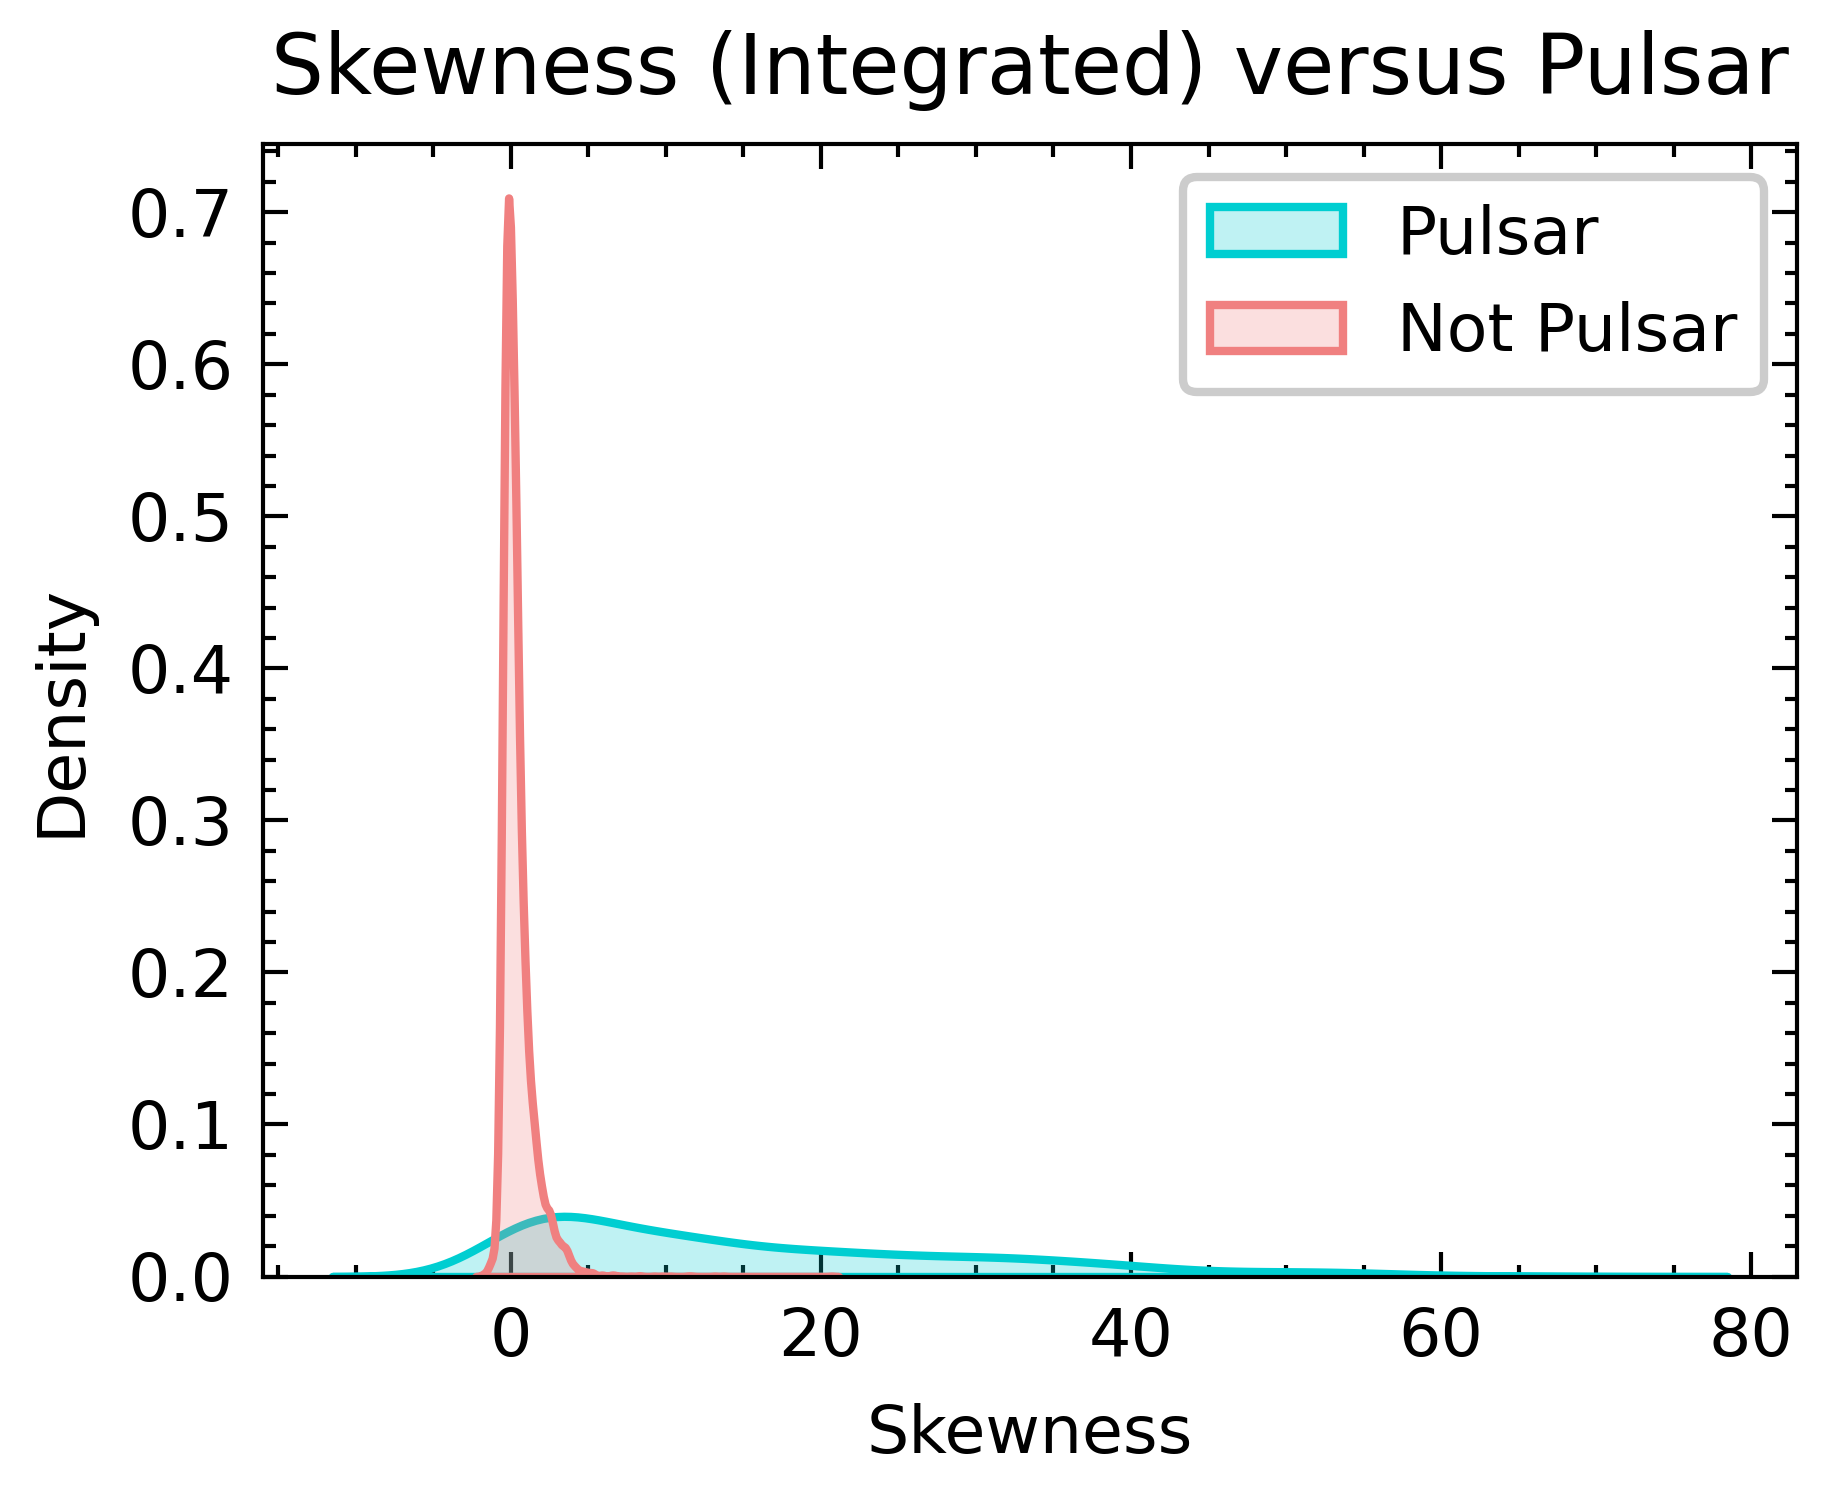

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["skew_integ"][df_train.target == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["skew_integ"][df_train.target == 0], color="lightcoral", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Skewness (Integrated) versus Pulsar',fontsize = 10)
ax.set(xlabel='Skewness')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('Skewness integ')
plt.show()

We can generally say that mean of non pulsar stars are high, standard deviation are high as well, excess kurtosis is generally lower and skewness is lesser in integrated profiles

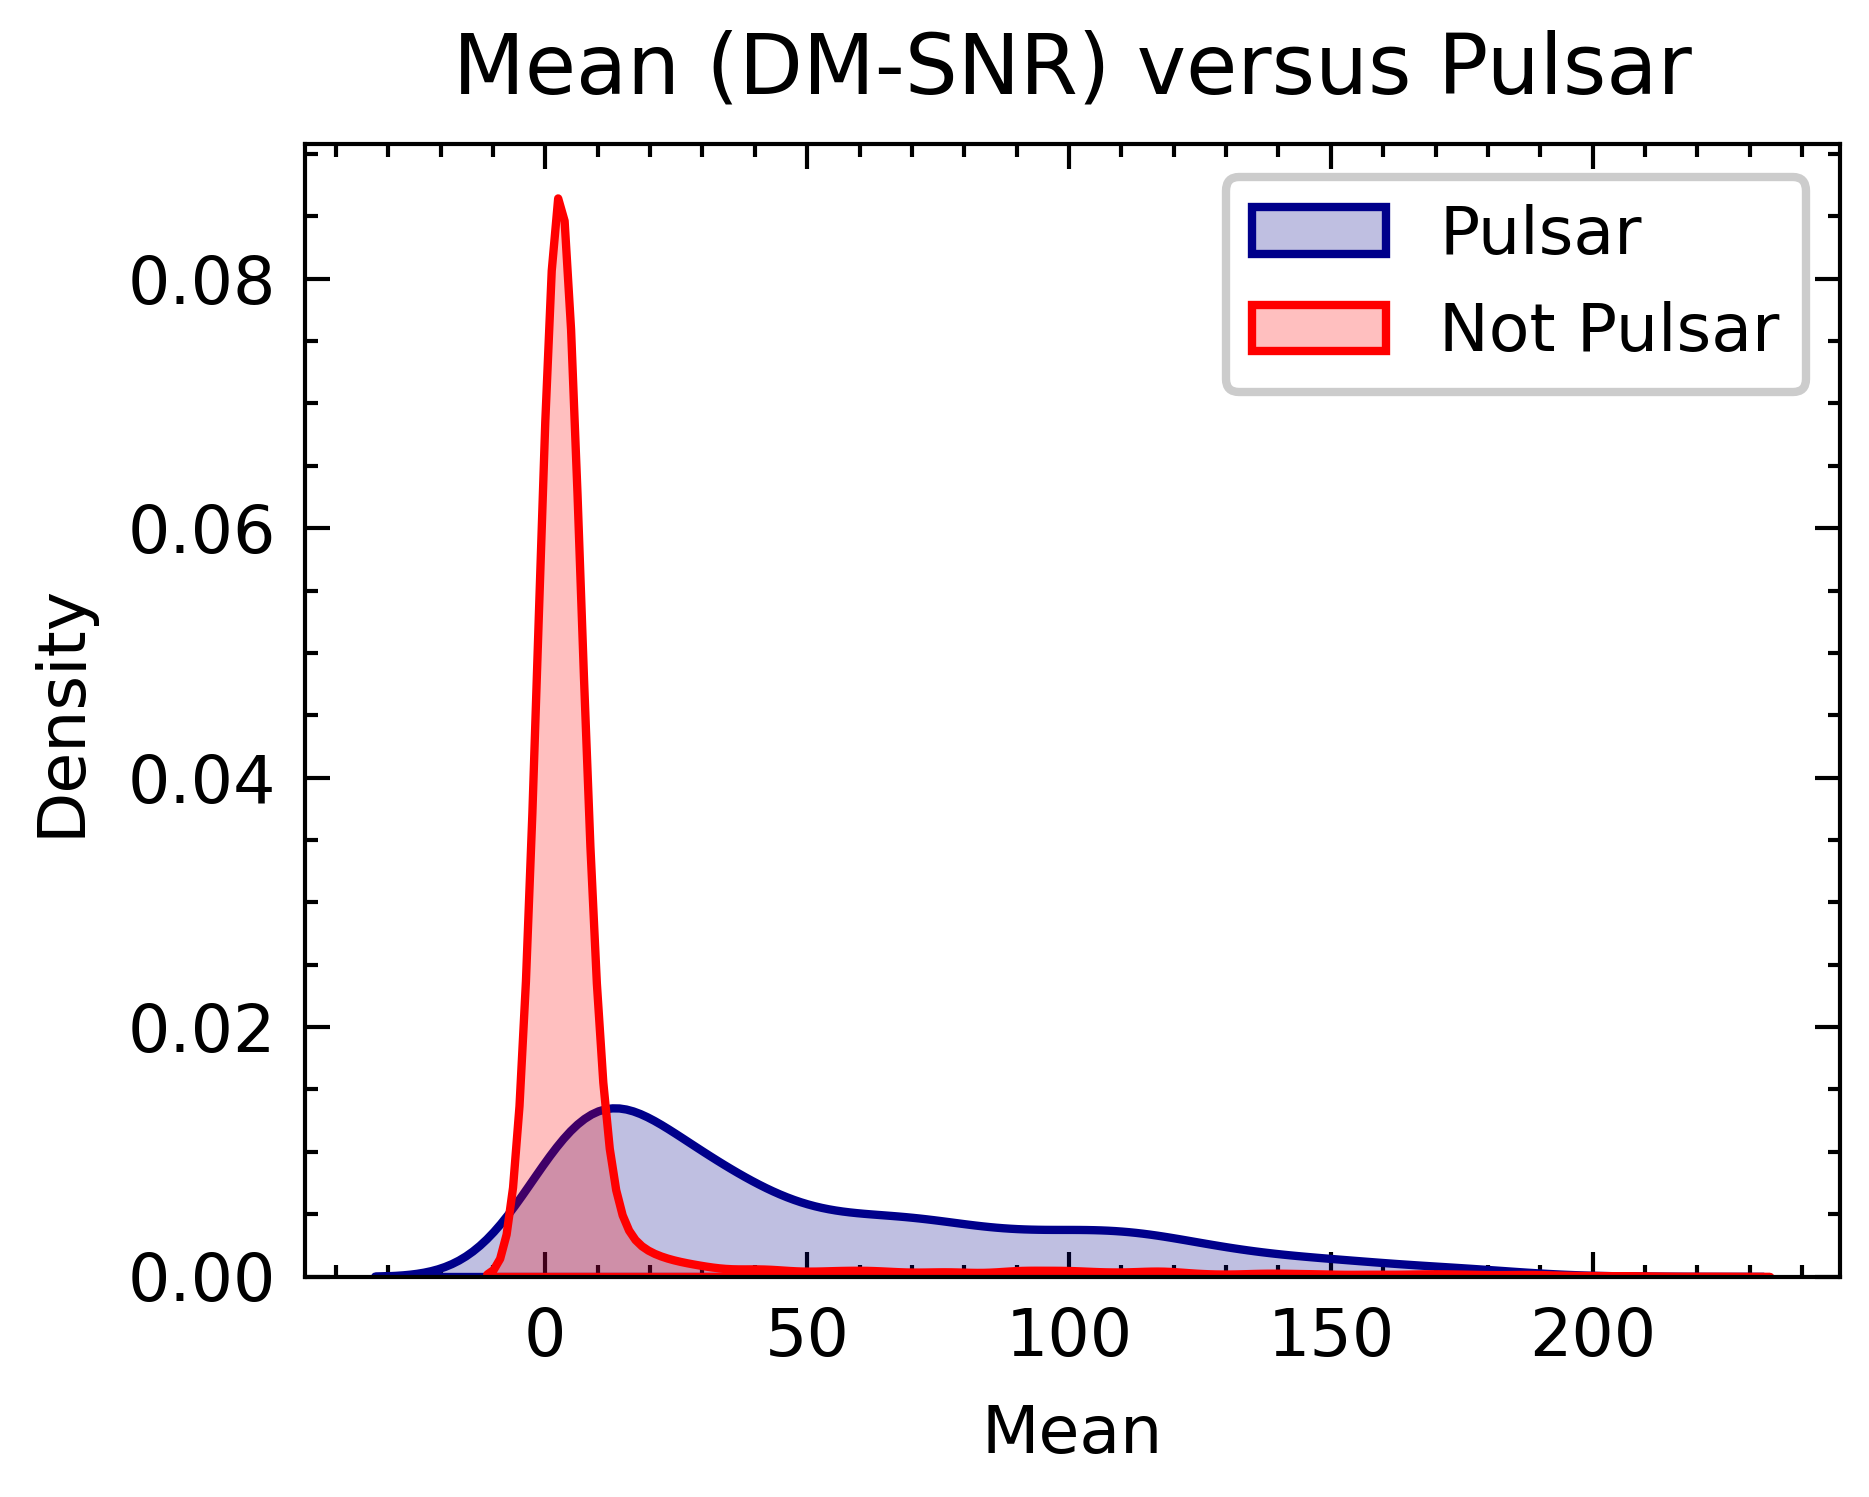

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["mean_dm"][df_train.target == 1], color="darkblue", shade=True)
sns.kdeplot(df_train["mean_dm"][df_train.target == 0], color="r", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Mean (DM-SNR) versus Pulsar',fontsize = 10)
ax.set(xlabel='Mean')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('Mean dmsnr')
plt.show()

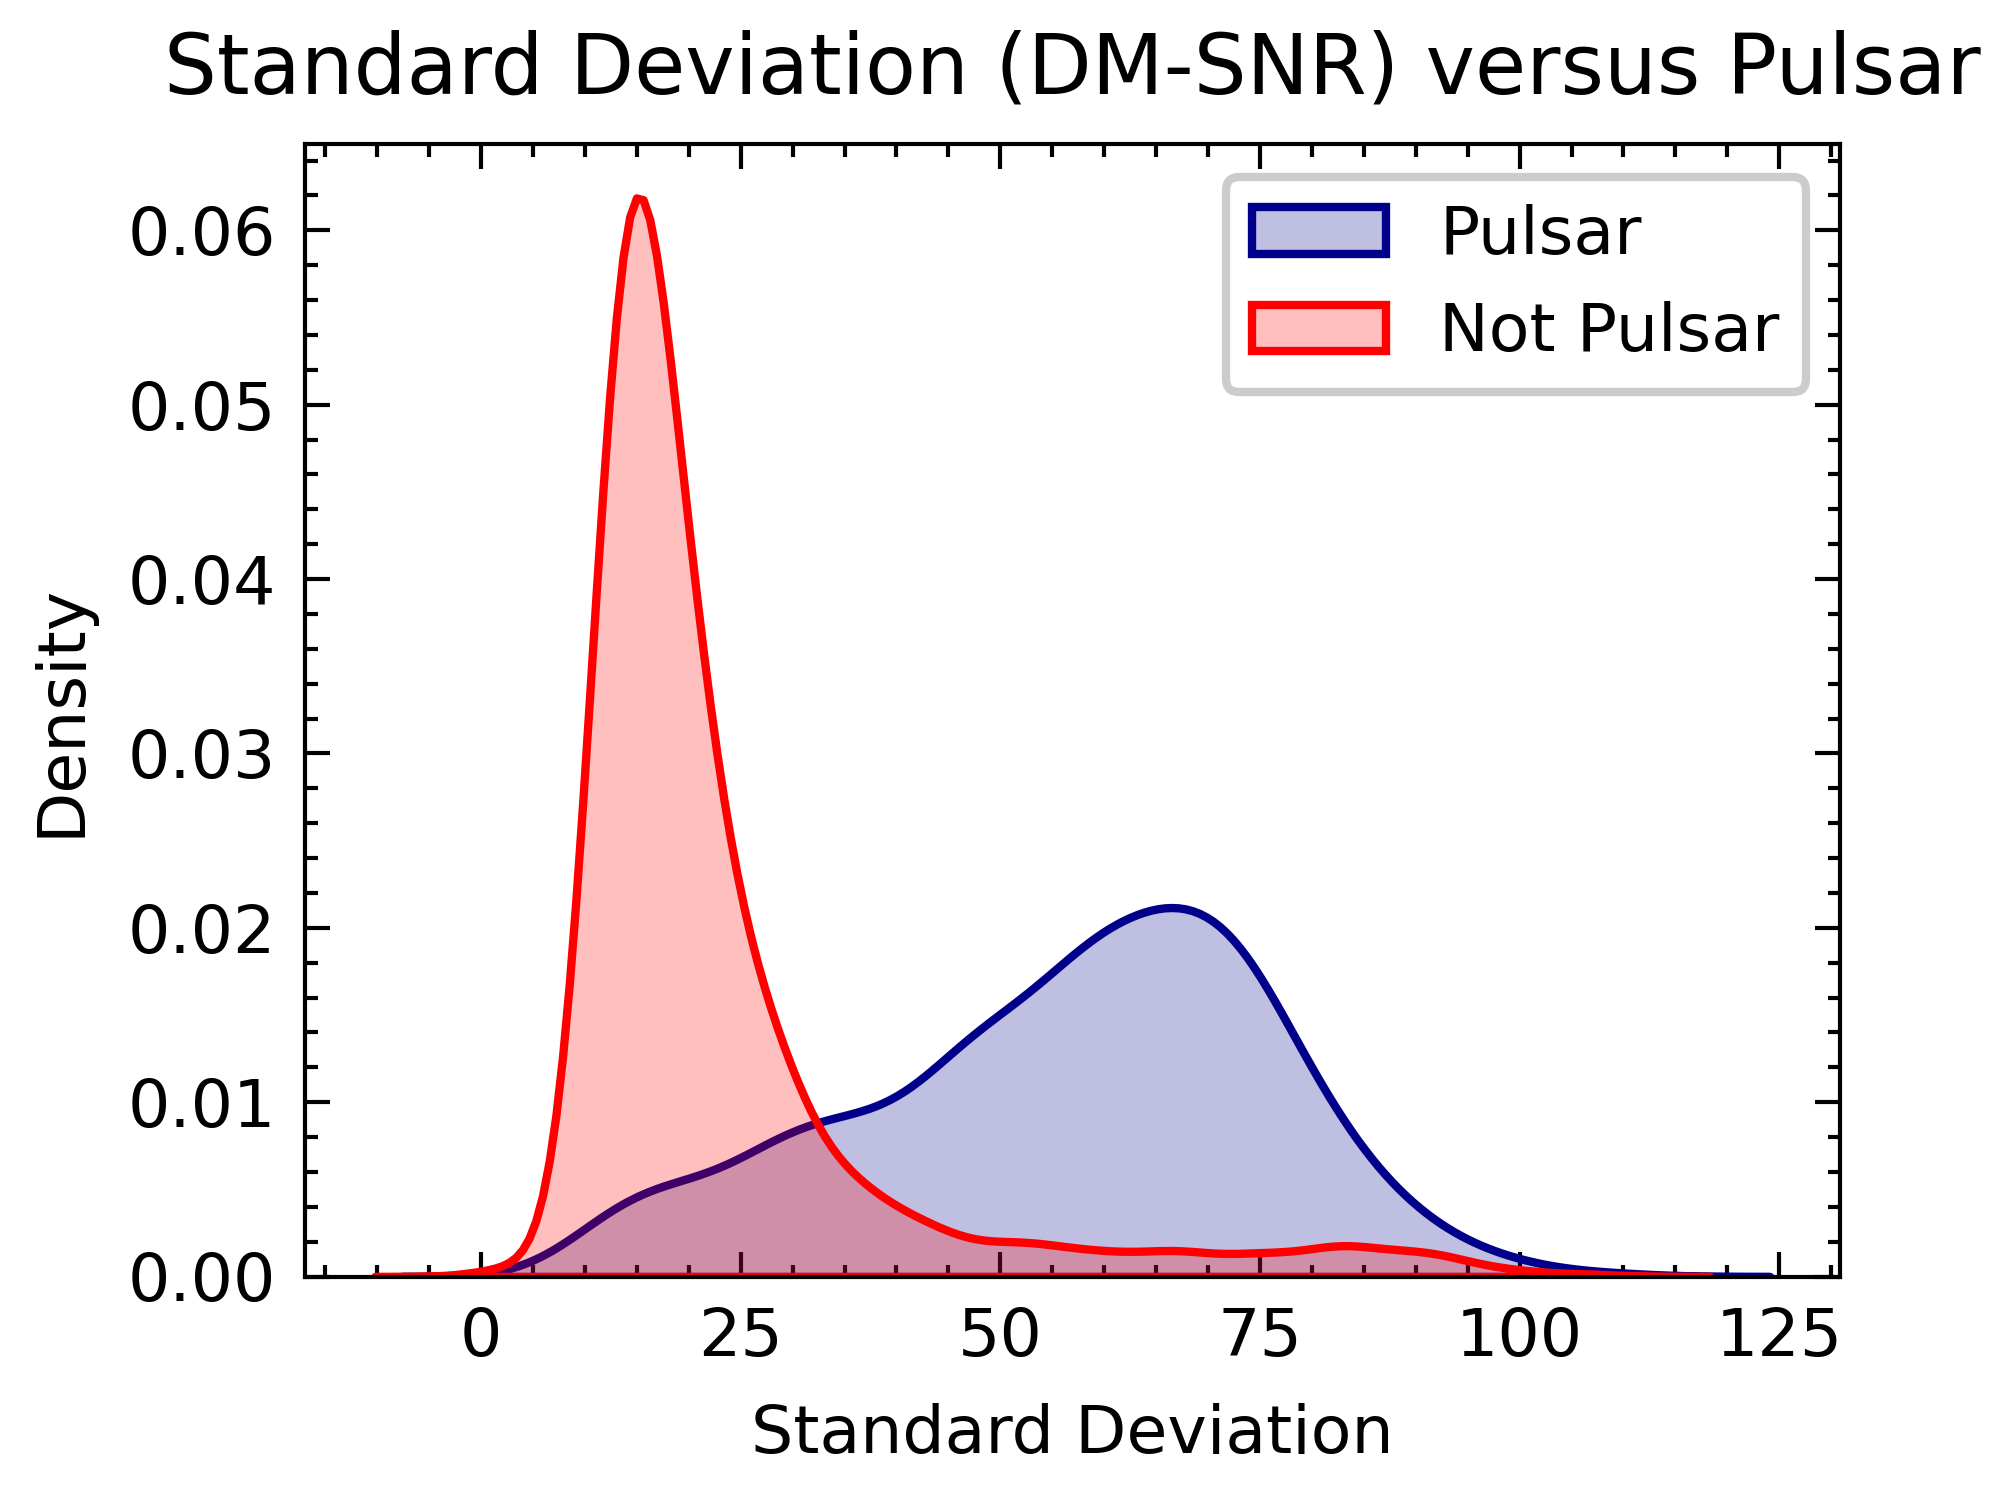

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["stddev_dm"][df_train.target == 1], color="darkblue", shade=True)
sns.kdeplot(df_train["stddev_dm"][df_train.target == 0], color="r", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Standard Deviation (DM-SNR) versus Pulsar',fontsize = 10)
ax.set(xlabel='Standard Deviation')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('stddev dmsnr')
plt.show()

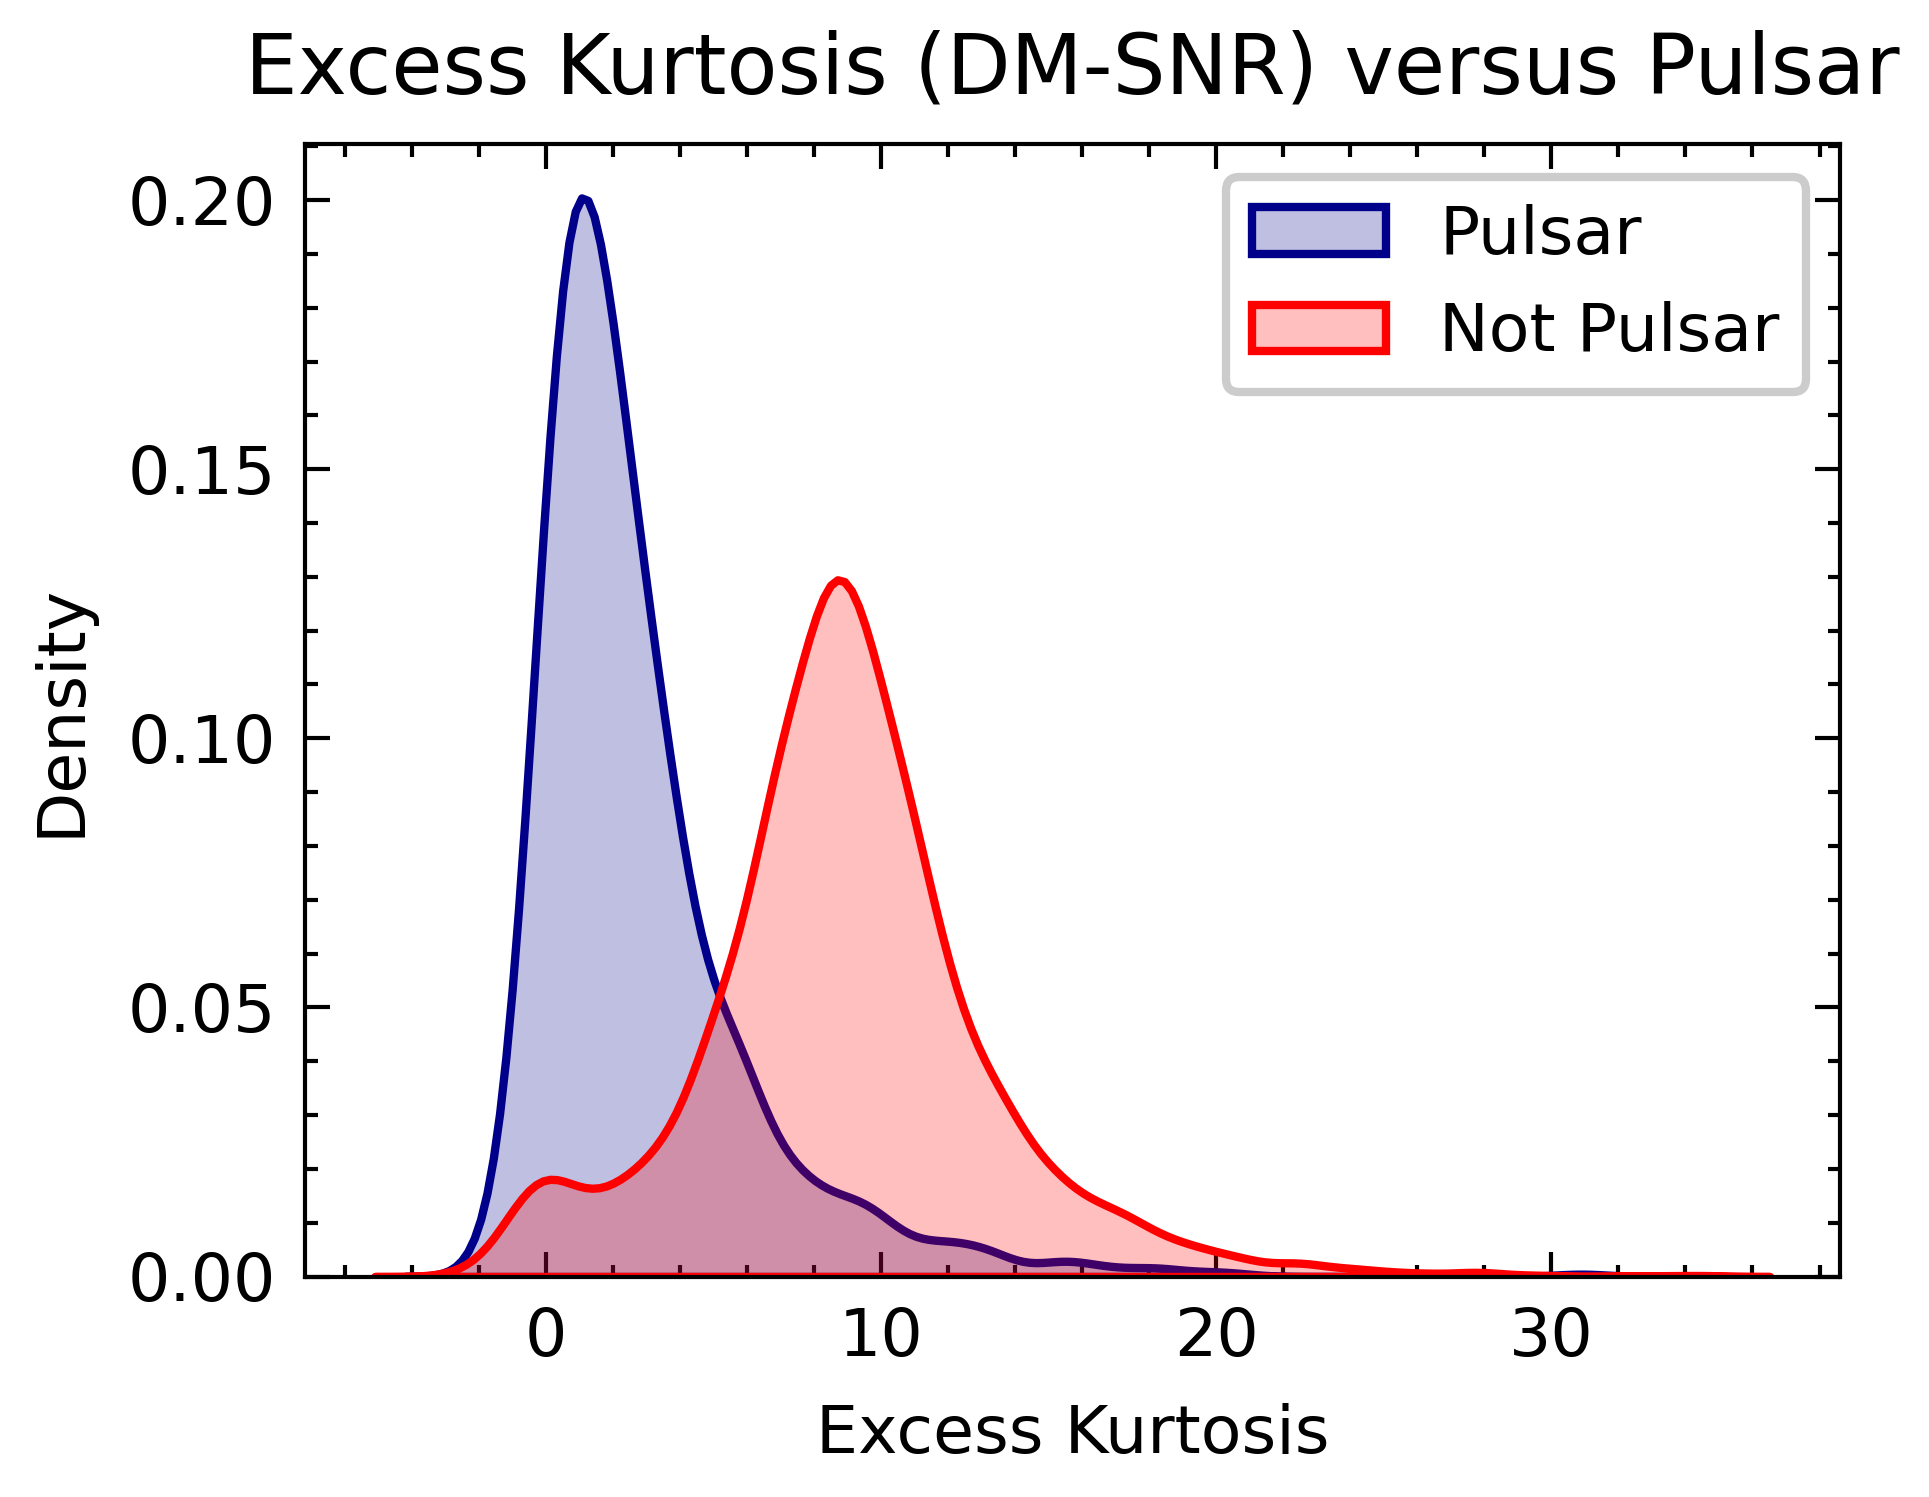

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["ekurt_dm"][df_train.target == 1], color="darkblue", shade=True)
sns.kdeplot(df_train["ekurt_dm"][df_train.target == 0], color="r", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Excess Kurtosis (DM-SNR) versus Pulsar',fontsize = 10)
ax.set(xlabel='Excess Kurtosis')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('ekurtosis dmsnr')
plt.show()

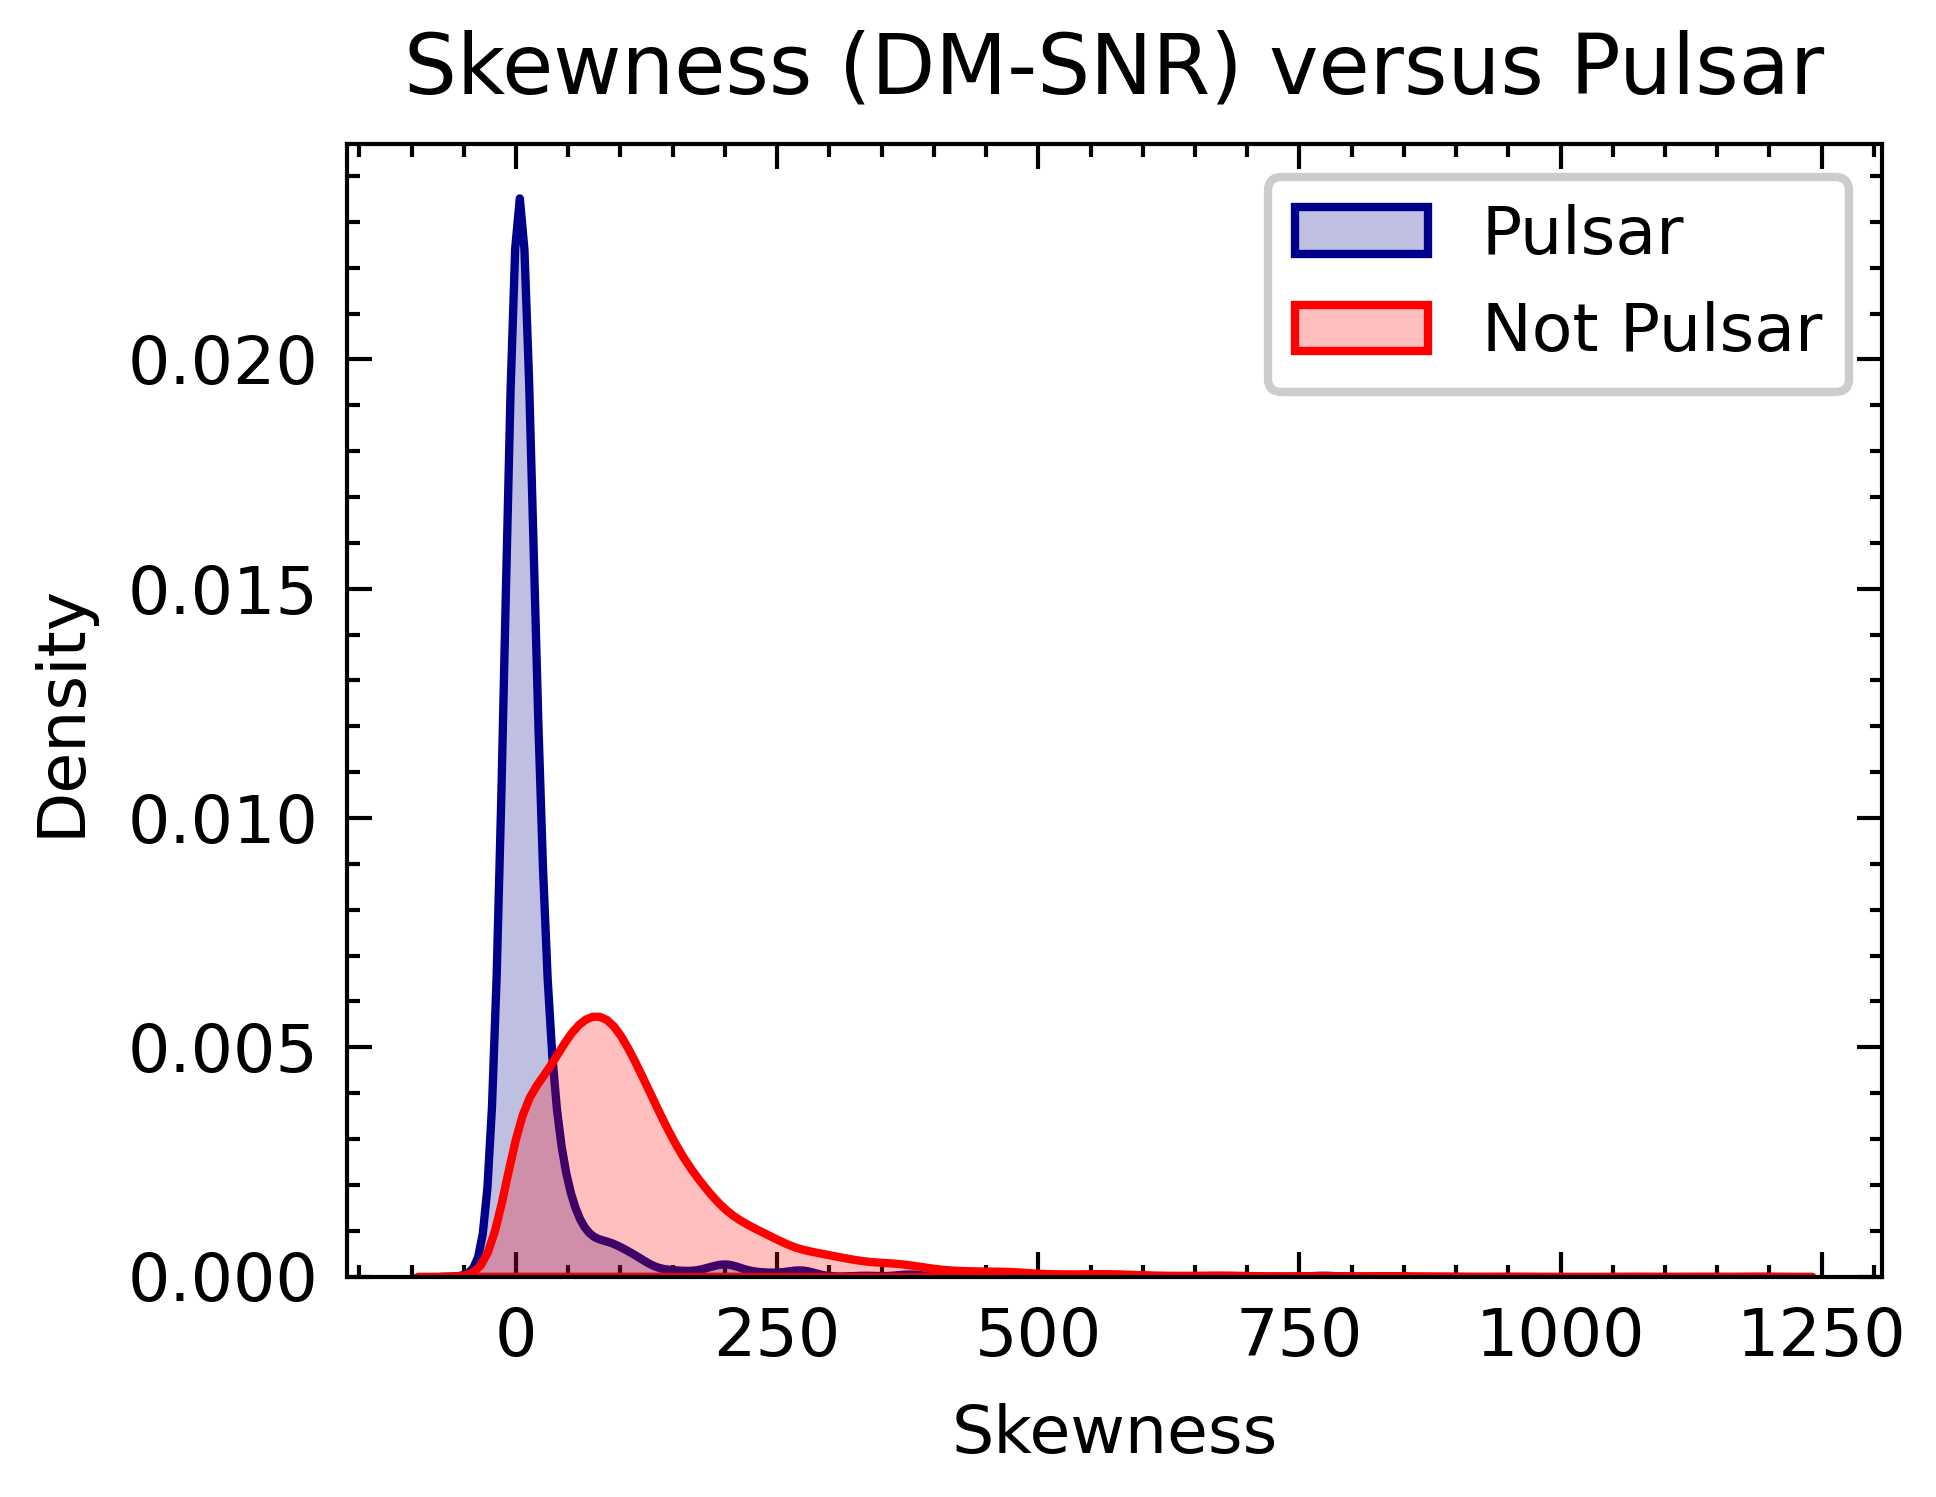

In [ ]:
plt.figure()
ax = sns.kdeplot(df_train["skew_dm"][df_train.target == 1], color="darkblue", shade=True)
sns.kdeplot(df_train["skew_dm"][df_train.target == 0], color="r", shade=True)
plt.legend(['Pulsar', 'Not Pulsar'])
plt.title('Skewness (DM-SNR) versus Pulsar',fontsize = 10)
ax.set(xlabel='Skewness')
plt.grid(False)
# plt.xlim(-10,85)
plt.savefig('skew dmsnr')
plt.show()

For DM-SNR profiles: 
Mean for non-pulsar is lower, standard deviation is low, excess kurtosis is high, skewness is large compared to pulsar stars

## Data Preprocessing

For SVM, data scaling is very vital. We are going to do standardization here (mean 0 and var 1) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_train.drop('target',axis=1)
y = df_train['target']
X = scaler.fit_transform(X)
df_train[df.columns] = X

In [ ]:
df_train.shape

(12528, 9)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split 
X = df_train.drop('target',axis=1)
y = df_train['target']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,
                                              random_state = 42,stratify=y)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [ ]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(8769, 8) (3759, 8) (8769,) (3759,)


In [ ]:
# checking if stratified split worked
sum(y_train==0)/len(y_train)*100

90.79712624016422

In [ ]:
sum(y_val==0)/len(y_val)*100

90.7954243149774

## SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(class_weight='balanced')
param_grid = [{'C':np.logspace(-7,3,base=2,num=10),
               'kernel':['linear']},
              {'C':np.logspace(-7,3,base=2,num=10),
               'gamma':np.logspace(-7,3,base=2,num=10),
               'kernel':['rbf']}]

In [ ]:
grid = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,verbose=2,scoring='f1')

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid=[{'C': array([7.81250000e-03, 1.68759334e-02, 3.64540325e-02, 7.87450656e-02,
       1.70098750e-01, 3.67433623e-01, 7.93700526e-01, 1.71448797e+00,
       3.70349885e+00, 8.00000000e+00]),
                          'kernel': ['linear']},
                         {'C': array([7.81250000e-03, 1.68759334e-02, 3.64540325e-02, 7.87450656e-02,
       1.70098750e-01, 3.67433623e-01, 7.93700526e-01, 1.71448797e+00,
       3.70349885e+00, 8.00000000e+00]),
                          'gamma': array([7.81250000e-03, 1.68759334e-02, 3.64540325e-02, 7.87450656e-02,
       1.70098750e-01, 3.67433623e-01, 7.93700526e-01, 1.71448797e+00,
       3.70349885e+00, 8.00000000e+00]),
                          'kernel': ['rbf']}],
             scoring='f1', verbose=2)

In [ ]:
grid.best_params_

{'C': 3.7034988491491627, 'gamma': 0.0078125, 'kernel': 'rbf'}

In [ ]:
clf_best = grid.best_estimator_

In [ ]:
clf_best.score(X_train,y_train)

0.9728589348842513

In [ ]:
clf_best.n_support_

array([1350,  138])

1350 support vectors for class 0, 138 support vectors for class 1 (Total: 1488 support vectors). Only 15% data. Remaining are sparse.

In [ ]:
clf_best.support_vectors_.shape

(1488, 8)

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score,recall_score, confusion_matrix
cm = confusion_matrix(y_val,clf_best.predict(X_val))

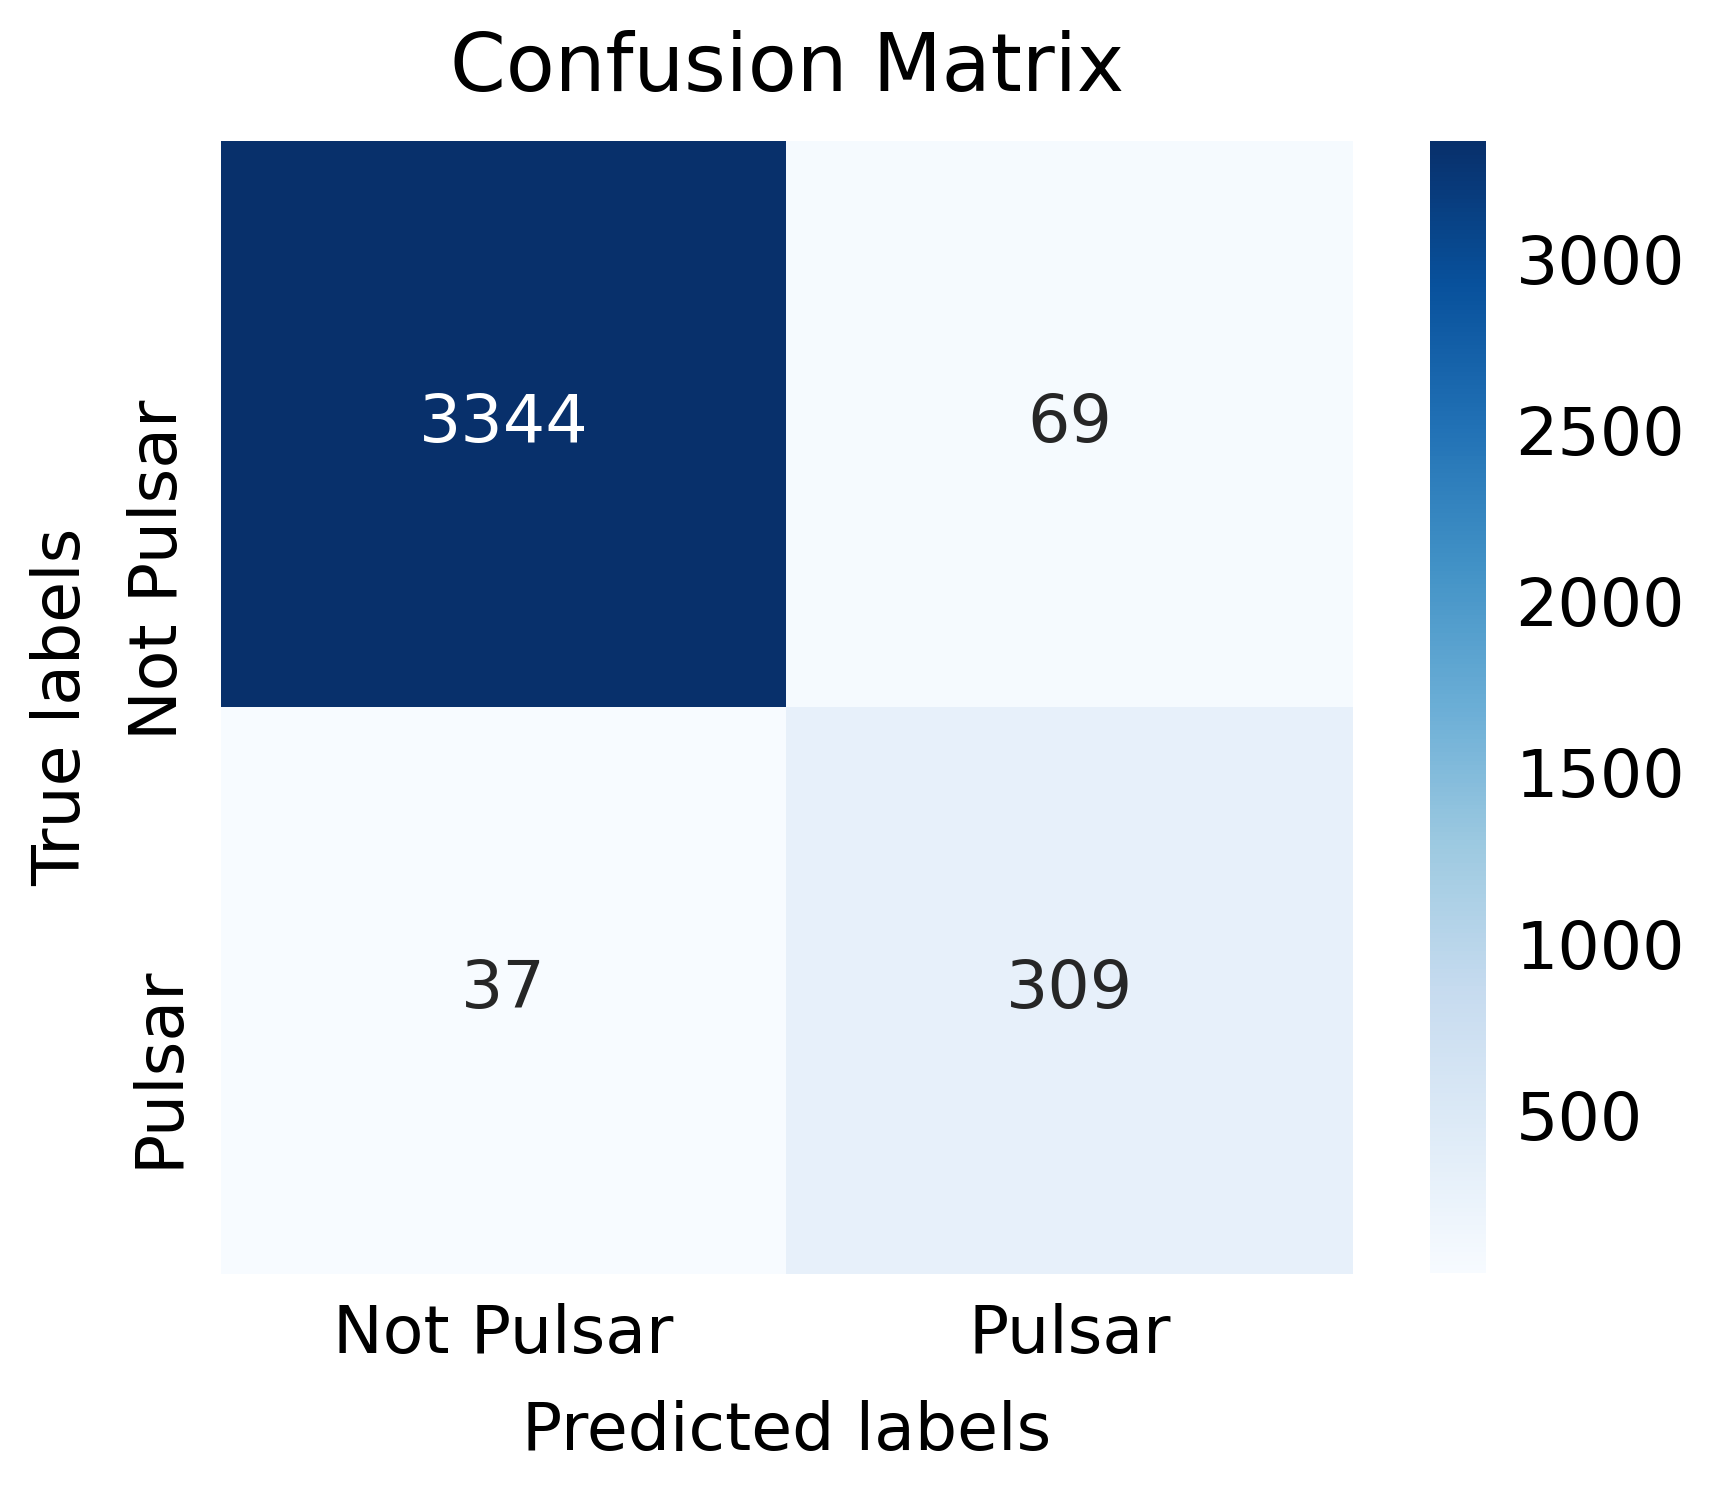

In [ ]:
ax = plt.subplot()
sns.heatmap(cm,square = True,annot = True, cbar =True,cmap = 'Blues',fmt='g',
           xticklabels=['Not Pulsar','Pulsar'],yticklabels=['Not Pulsar','Pulsar'],ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.savefig('ConfusionMatrix')
plt.show()

In [ ]:
def evaluation(y_act,y_pred):
    print("Accuracy :", accuracy_score(y_act,y_pred))
    print("Precision :", precision_score(y_act,y_pred))
    print("Recall :", recall_score(y_act,y_pred))
    print("F1 Score :", f1_score(y_act,y_pred))

In [ ]:
evaluation(y_val,clf_best.predict(X_val))

Accuracy : 0.9718010109071562
Precision : 0.8174603174603174
Recall : 0.8930635838150289
F1 Score : 0.8535911602209945


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
y_scores = clf_best.decision_function(X_val)
# maxi = y_scores.max()
y_scores = y_scores
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

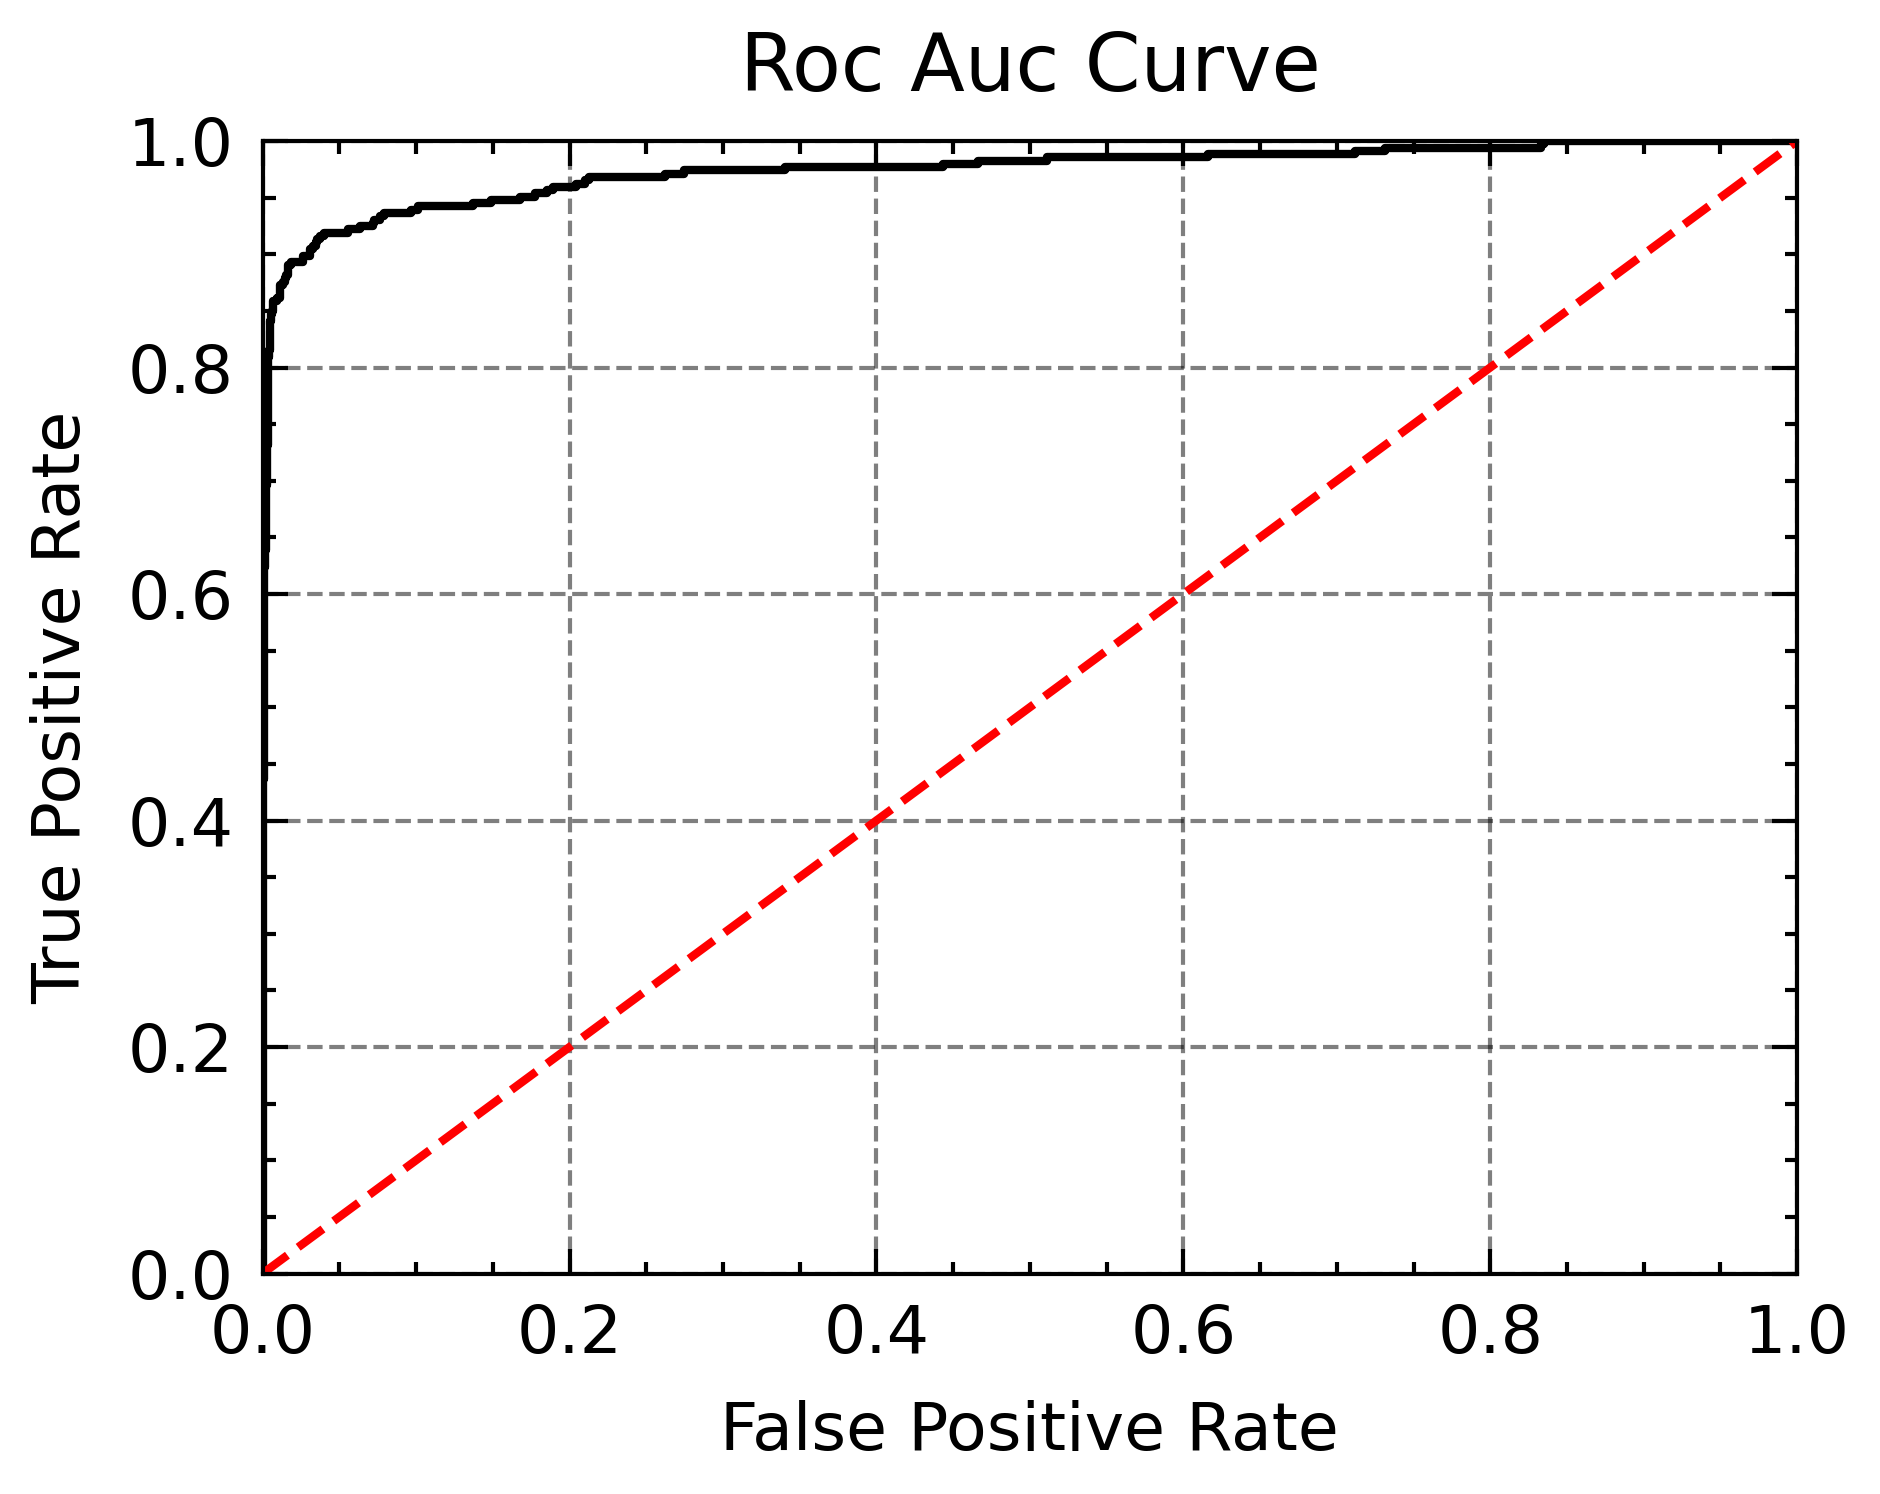

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Auc Curve')
plt.savefig('Rocauccurve')
plt.show()

In [ ]:
# Auc roc score
roc_auc_score(y_val, y_scores)

0.9738233107347122

## Preparing Test set

In [ ]:
X_test = df_test.drop('target',axis=1)
X_test[X_test.columns] = imp.transform(X_test)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
y_pred = clf_best.predict(X_test)

In [ ]:
df_test.target = y_pred

In [ ]:
df_test.to_csv("submission.csv",index = False)